## Capital One Data Science Challenge

This python notebook is intended to solve data science challenger from Capital One. I have attempted to provide explanation for most of the steps taken throughout the process. That said, I would be happy to provide any additional clarification, if required. Should you have any further questions, please reach out to me @ gaurav11235@gmail.com (Candidate ID: C1708930)

As part of the Data Science Challenger, there were primarily 4 questions asked. So, I have divided my solution broadly in four parts with sub-sections under some of them.  

1. <a href="#Question-1:-Load">Load, clean and summarize the data </a>
2. <a href="#Question-2:-Plot">Plot Histogram for transaction amount </a>
3. <a href="#Question-3:-Data-Wrangling---Duplicate-Transactions">Data Wrangling - Duplicate Transactions </a>
4. <a href="#Question-4:-Model">Build Fraud Detection Model </a>                                       
    - <a href="#1.-Data-exploration-and-Features-engineering">Feature Engineering and Exploration </a>    
        -  <a href="#Feature-Engineering-and-Exploration:-Date-columns">Date Columns </a>
        -  <a href="#Feature-Engineering-and-Exploration:-Numeric-Columns">Numeric Columns </a>
        -  <a href="#Feature-Engineering-and-Exploration:-Categorical/Object-columns">Categorical Columns </a>
    - <a href="#Create-Train-and-Test-Samples">Create Train and Test Samples </a>                   
    - <a href="#Build-models-and-produce-model-performance">Build Models and review its performance </a>   
        -  <a href="#Model-1:-Light-GBM-(No-oversampling)">Light GBM (No Oversampling) </a>
        -  <a href="#Model-2:-Decision-Tree-(No-oversampling)">Decision Tree (No Oversampling) </a>
        -  <a href="#Model-3:-XGBoost-(No-oversampling)">XGBoost (No Oversampling) </a>
        -  <a href="#Model-4:-Logistic-Regression-(No-Oversampling)">Logistic Regression (No Oversampling) </a>
        -  <a href="#Model-5:-Random-Forest-(No-Oversampling)">Random Forest (No Oversampling) </a>
        -  <a href="#Model-6:-Neural-Network-(No-Oversampling)">Neural Network (No Oversampling) </a>
        -  <a href="#Model-7:-CatBoost-(without-Oversampling)">Catboost (No Oversampling) </a>
        -   Models tested on oversampled data (using ADASYN):
        -  <a href="#Model-1:-Light-GBM-(oversampled)">Light GBM (Oversampled) </a>
        -  <a href="#Model-2:-MLP-Neural-Network-(oversampled)">MLP Neural Network (Oversampled) </a>
        -  <a href="#Model-3:-XGBoost-(Oversampled)">XGBoost (Oversampled) </a>
        -  <a href="#Model-4:-Decision-Tree-(Oversampled)">Decision Tree (Oversampled) </a>
        -  <a href="#Model-5:-Catboost-(Oversampled)">Catboost (Oversampled) </a>
        -  <a href="#Model-6:-Random-Forest-(Oversampled)">Random Forest (Oversampled) </a>
5. <a href="#Summary-of-Model-results">Summary of Model Results </a>
6. <a href="#Discussion-Points-on-Future-Improvement:">Areas of Improvement </a>
                    

# Overview
My goal of this project is to answer all the above questions, report all the findings, considerations and choices that were made during the process. Throughout the notebook, there are sections tagged 'observations' and 'Next Action Items'.  Further, the term 'variable', 'column' and 'feature' have been interchangebly used throughout the notebook, they all imply the same thing in the context of my work.

# Instructions to run the notepad:
user can run each cell one by one sequentially to get to the final output. Another quick way would be to scroll down the tab 'Run' and select 'Run all cells'. That said, I would recommend to run the notebook sequentially.

The first cell code imports all the necessary libraries. I will continue to update the list as needed going forward

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,5))
from zipfile import ZipFile
import os
import glob
import datetime
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
import statsmodels.api as sm
import time
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)


## Question 1: Load
- Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here (link provided in the email)
- Please describe the structure of the data. Number of records and fields in each record?
- Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

# Approach:
There were 2 approaches that I considered:
- Clone to local github
- read in-memory, open zip folder and read the file 

And went with second one for the project. So, the steps that are involved in reading the files are:
- get the raw location of the zipped folder from github, 
- unzip it , 
- read line by line.

At first go, I am simply reading one line to see how it looks like. In second part, I am reading the json file into pandas dataframe.

In [3]:
import requests, zipfile, io 
r=requests.get('https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip')
zf=zipfile.ZipFile(io.BytesIO(r.content))
from itertools import islice

with zipfile.ZipFile(io.BytesIO(r.content)) as zf:
        with io.TextIOWrapper(zf.open('transactions.txt')) as file:
            for line in islice(file,1,2):
                print(line)

{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-10-11T05:05:54", "transactionAmount": 74.51, "merchantName": "AMC #191138", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "09", "posConditionCode": "01", "merchantCategoryCode": "entertainment", "cardPresent": true, "currentExpDate": "02/2024", "accountOpenDate": "2015-03-14", "dateOfLastAddressChange": "2015-03-14", "cardCVV": "486", "enteredCVV": "486", "cardLast4Digits": "767", "transactionType": "PURCHASE", "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}



The output above shows how the file looks like. It is a json file format (as also underlined in email), so just reading it again in a dataframe

In [4]:
with zipfile.ZipFile(io.BytesIO(r.content)) as zf:
        with io.TextIOWrapper(zf.open('transactions.txt')) as file:
            df=pd.read_json(file, lines=True) 

            print("The number of rows are=", df.shape[0])
            print("The number of columns are=", df.shape[1])

The number of rows are= 786363
The number of columns are= 29


In [5]:
      df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


**Observations**:
- Transactiondatetime looks like string variable due to 'T' appearing in between datetime
- isFraud is boolian (and few other features are also boolian)
- There are about 6 features that are showing missing values and not NaN for all the 5 records seen so far

**Next Action Items**
- Review datatypes 

In [6]:
print("Review the datatypes")
df.info()

Review the datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate        

**Observations**:
- The 6 features that had spaces (as seen from previous result) are being reported as non-null.
- The datetime is defined as object type
- There are 3 boolian columns

**Next Action Item**
- Describe Numeric, Object and boolian type columns separately

In [7]:
pd.set_option('display.precision', 3) 
# describe only the numeric variables:
print("Describe Numeric columns")
print(" ")
print(df.describe(include = [np.number]).transpose())
# followed by only the character variables:
print(" ")
print("Describe character columns")
print(" ")
print(df.describe(include = [np.object]).transpose())
print(" ")
print("Describe boolian columns")
print(df.describe(include = [np.bool]).transpose())

Describe Numeric columns
 
                      count       mean        std        min        25%        50%        75%        max
accountNumber      786363.0  5.372e+08  2.554e+08  1.001e+08  3.301e+08  5.075e+08  7.676e+08  9.994e+08
customerId         786363.0  5.372e+08  2.554e+08  1.001e+08  3.301e+08  5.075e+08  7.676e+08  9.994e+08
creditLimit        786363.0  1.076e+04  1.164e+04  2.500e+02  5.000e+03  7.500e+03  1.500e+04  5.000e+04
availableMoney     786363.0  6.251e+03  8.881e+03 -1.006e+03  1.077e+03  3.185e+03  7.500e+03  5.000e+04
transactionAmount  786363.0  1.370e+02  1.477e+02  0.000e+00  3.365e+01  8.790e+01  1.915e+02  2.012e+03
cardCVV            786363.0  5.445e+02  2.615e+02  1.000e+02  3.100e+02  5.350e+02  7.850e+02  9.980e+02
enteredCVV         786363.0  5.442e+02  2.616e+02  0.000e+00  3.100e+02  5.350e+02  7.850e+02  9.980e+02
cardLast4Digits    786363.0  4.757e+03  2.997e+03  0.000e+00  2.178e+03  4.733e+03  7.338e+03  9.998e+03
currentBalance     786363.0 

**Observations**
- The date variables are defined as object, that needs to be converted to datetime format
- There are 3 boolian features, may be a good idea to convert them to integer 
- From the describe report, it looks like following 6 features have all the missing values since they have only 1 unique value and top column shows space/empty: 
  echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd 
- The space in those 6 features shows that missing values are not read as NaN in the dataframe
- Available money has lowest value as negative. That's interesting to see, and would like to explore it later

**Next Action Items**
- (CLEAN UP THE DATA):Create new dataframe where I will:
- Convert dates to datetime format
- Convert boolian to integers
- Replace space with NaN
- Calculate count of missing and its %
- Remove the features that have all the values missing

In [8]:
#Convert Dates to Datetime format
df['transactionDateTime']=[item.replace("T"," ") for item in df["transactionDateTime"].tolist()]
df['transactionDateTime']=pd.to_datetime(df['transactionDateTime'], format='%Y-%m-%d %H:%M:%S')
df['currentExpDate']=[int(datetime.datetime.strptime(item, '%m/%Y').strftime('%Y%m')) for item in df["currentExpDate"].tolist()]
df['accountOpenDate']=[datetime.datetime.strptime(item, '%Y-%m-%d') for item in df["accountOpenDate"].tolist()]
df['dateOfLastAddressChange']=[datetime.datetime.strptime(item, '%Y-%m-%d') for item in df["dateOfLastAddressChange"].tolist()]

#Convert all Boolians to integer
# For an unknown number or large number of boolian features, I would put a for loop to automatically pull all boolians but here
# the number of boolian features are only 3, so I would simply convert them to integer
df[['cardPresent', 'expirationDateKeyInMatch','isFraud']] = (df[['cardPresent', 'expirationDateKeyInMatch','isFraud']] == True).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              786363 non-null  object        
 10  posConditionCode          786363 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

# Missing Value Report
Looks like the date features have been converted to datetime correctly and boolians have been converted to integer. Moving to next Step of getting count of missing values

In [9]:
##Missing value treatment to object types
#Convert all spaces to NaN 
for x in df.columns.to_list():
    if np.issubdtype(df[x],np.object_):
        df[x]=df[x].replace({'': np.NaN})

In [10]:
# count missing and missing(%) for each column 
temp_df=pd.DataFrame(columns = ['column_name', 'Data_type','Missing_count','Missing_percent'])
for x in df.columns.to_list():
     temp_df = temp_df.append({'column_name': x,'Data_type':df[x].dtypes,'Missing_count': df[x].isnull().sum(axis=0),'Missing_percent': df[x].isnull().mean(axis=0)*100}, ignore_index=True)
temp_df

,column_name,Data_type,Missing_count,Missing_percent
0,accountNumber,int64,0,0.000
1,customerId,int64,0,0.000
2,creditLimit,int64,0,0.000
3,availableMoney,float64,0,0.000
4,transactionDateTime,datetime64[ns],0,0.000
5,transactionAmount,float64,0,0.000
6,merchantName,object,0,0.000
7,acqCountry,object,4562,0.580
8,merchantCountryCode,object,724,0.092
9,posEntryMode,object,4054,0.516


**Observations**
- As predicted earlier, there are 6 features that have all the values missing

**Next Action Item**
- Remove those features from the table
- Check all the object types again 

In [11]:
in_df=df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1)
#can use drop NA
print("no of rows are=", in_df.shape[0])
print("no of columns are=", in_df.shape[1])
in_df.describe(include = [np.object]).transpose()

no of rows are= 786363
no of columns are= 23


,count,unique,top,freq
merchantName,786363,2490,Uber,25613
acqCountry,781801,4,US,774709
merchantCountryCode,785639,4,US,778511
posEntryMode,782309,5,05,315035
posConditionCode,785954,3,01,628787
merchantCategoryCode,786363,19,online_retail,202156
transactionType,785665,3,PURCHASE,745193


Impute np.NaN with 'missing' as I would prefer to impute them 'missing' during the conversion of categorical columns to dummy variables

In [12]:
for x in in_df.columns.to_list():
    if np.issubdtype(in_df[x],np.object_):
        in_df[x]=in_df[x].replace({np.NaN:'Missing'})
        
#Check imputation for one object variables 
print("Unique levels of transactionType code")
in_df['transactionType'].unique()

Unique levels of transactionType code


array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', 'Missing'],
      dtype=object)

In [13]:
pd.set_option('display.precision', 3) 
# describe only the numeric variables:
print("Describe Numeric columns")
print(" ")
print(in_df.describe(include = [np.number]).transpose())
# followed by only the character variables:
print(" ")
print("Describe character columns")
print(" ")
print(in_df.describe(include = [np.object]).transpose())
#print(" ")
#print("Describe boolian columns")
#print(in_df.describe(include = [np.bool]).transpose())
print(" ")
print("Describe Datetime columns")
print(in_df.describe(include = [np.datetime64]).transpose())

Describe Numeric columns
 
                             count       mean        std        min        25%        50%        75%        max
accountNumber             786363.0  5.372e+08  2.554e+08  1.001e+08  3.301e+08  5.075e+08  7.676e+08  9.994e+08
customerId                786363.0  5.372e+08  2.554e+08  1.001e+08  3.301e+08  5.075e+08  7.676e+08  9.994e+08
creditLimit               786363.0  1.076e+04  1.164e+04  2.500e+02  5.000e+03  7.500e+03  1.500e+04  5.000e+04
availableMoney            786363.0  6.251e+03  8.881e+03 -1.006e+03  1.077e+03  3.185e+03  7.500e+03  5.000e+04
transactionAmount         786363.0  1.370e+02  1.477e+02  0.000e+00  3.365e+01  8.790e+01  1.915e+02  2.012e+03
currentExpDate            786363.0  2.026e+05  3.956e+02  2.019e+05  2.023e+05  2.026e+05  2.030e+05  2.033e+05
cardCVV                   786363.0  5.445e+02  2.615e+02  1.000e+02  3.100e+02  5.350e+02  7.850e+02  9.980e+02
enteredCVV                786363.0  5.442e+02  2.616e+02  0.000e+00  3.100e+0

## Question 2: Plot
- Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
- Report any structure you find and any hypotheses you have about that structure.

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

Max transactionAmount is= 2011.54
Min transactionAmount is= 0.0


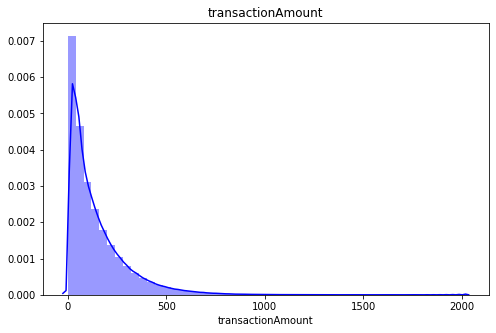

In [14]:
#plot the time feature
plt.figure(figsize=(8,5))
plt.title('transactionAmount')
sns.distplot(in_df['transactionAmount'],color='blue');
print("Max transactionAmount is=", in_df['transactionAmount'].max())
print("Min transactionAmount is=",in_df['transactionAmount'].min())

**Observations**:
- It looks like majority of transaction amounts lie between 0 to 500 dollars and it mostly peaks under 50 dollars.
- My hypothesis is that it is possible that many purchases are made in resturents/Dining. Grocery is also an option but my grocery
  bill is usually over 100 dollars per transaction, so cant' say for sure. Amazon transactions are under 50 dollars and if this card is used 
  to pay some kind of bills on monthly basis, that might also fall in this category. 
- The distribution is right skewed.The maximum transaction amount is 2011.54 dollars, could that be towards international travel/airline ticket purchase? Possible.
- All the transaction amounts are positive indicating that no transactions require reporting the trans amt as negative for all cases including reversal cases

**Next Action Item**:
- Lets quickly check distribution again, by using 500 dollars as upper limit.

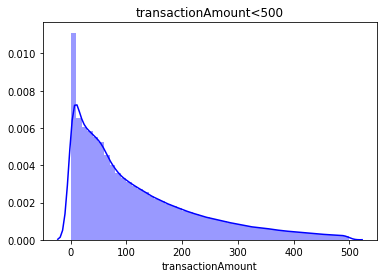

In [15]:
temp_df=in_df.query('transactionAmount<500')
plt.title('transactionAmount<500')
sns.distplot(temp_df['transactionAmount'],color='blue');

**Observations**:
- The frequency of transaction amount does appear to peak under $50 (may be 10-20 dollars). The monthly payment towards subscription or resturents purchases could be the the spend category

**Summary so far**
So, at this point, I have already handled following issues:
1. Converted all the date features to datetime
2. Converted Boolians to integer
3. Generated report for missing values
4. Removed columns that had 100% missing values
5. Plotted histogram of transaction amount

## Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed 
transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a 
customer's card multiple times within a short time span.
- Can you programmatically identify reversed and multi-swipe transactions?
- What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
- Did you find anything interesting about either kind of transaction?

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

**Observations**:
- Not sure what is the difference between reversal and multi-swipe transactions. Both seems like duplicate transactions at the moment.
- I remember looking at 'transactionType' column taking value as 'REVERSAL', so might take its help later to better understand,
- For now, I am going by definition: duplicate transactions, vendor charges multiple times in short span of time

**Action item**:
- Check for duplicates 
- Create time since last transaction (minutes, seconds, hours, days) features based on transactiondatetime column

In [16]:
#Sort the trans data for each account by transactiondttime ascending order 
in_df = in_df.sort_values(["accountNumber", "transactionDateTime"], ascending = (False, True))
#Check for duplicates by all columns first
temp_df=in_df.duplicated()
temp_df.unique()

array([False])

As expected, looks like no two rows are entirely duplicate when all the columns are selected. So, for multiswipe transactions, the transactiondatetime is likely different between 2 transactions (and may be, isFraud column could be different too?). So, my goal is to build a key that acts as unique key between what we we call as 'multi swipe transaction' and 'reversal'. I will need to look up some transactions that were swiped in short interval but that will require me to create 'time since last transaction' features first.  

Before I create time since transactions columns, let me check min and max of transaction date. If the transactions are years apart, then
I will need to account for change in year too

In [17]:
print("Minimum transaction Date =",in_df.transactionDateTime.min())
print("Maximum transaction Date =",in_df.transactionDateTime.max())

Minimum transaction Date = 2016-01-01 00:01:02
Maximum transaction Date = 2016-12-30 23:59:45


So, from above result, all the transactions occur in the year 2016. That helps to limit the calculations to months, days and seconds, minutes hours only

In [18]:
in_df['diff']=in_df.groupby('accountNumber')['transactionDateTime'].diff()
in_df['DaysSinceLastTransaction']=in_df['diff']/np.timedelta64(1,'D')
in_df['HoursSinceLastTransaction']=in_df['DaysSinceLastTransaction']*24
in_df['MinutesSinceLastTransaction']=in_df['HoursSinceLastTransaction']*60
in_df['SecondsSinceLastTransaction']=in_df['MinutesSinceLastTransaction']*60
in_df=in_df.drop(['diff'], axis=1)
in_df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,MinutesSinceLastTransaction,SecondsSinceLastTransaction
108107,999389635,999389635,5000,5000.00,2016-02-09 14:23:41,101.46,target.com,US,US,05,01,online_retail,201912,2015-10-09,2015-10-09,140,140,3991,PURCHASE,0.00,0,0,0,NaN,NaN,NaN,NaN
108108,999389635,999389635,5000,4923.54,2016-07-22 01:28:10,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,76.46,0,0,0,163.461,3923.075,235384.483,1.412e+07
108109,999389635,999389635,5000,4943.92,2016-08-04 20:27:36,42.98,oldnavy.com,US,US,09,01,online_retail,202307,2015-10-09,2015-10-09,140,140,3991,PURCHASE,56.08,0,0,0,13.791,330.991,19859.433,1.192e+06
108110,999389635,999389635,5000,4900.94,2016-08-22 11:42:48,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,99.06,0,0,0,17.636,423.253,25395.200,1.524e+06
108111,999389635,999389635,5000,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,US,US,09,01,food,203202,2015-10-09,2015-10-09,140,140,3991,PURCHASE,78.68,1,0,0,25.162,603.877,36232.600,2.174e+06
108112,999389635,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,346.30,0,0,0,5.933,142.385,8543.100,5.126e+05
108113,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,325.92,0,0,0,31.117,746.820,44809.183,2.689e+06
108114,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,305.54,0,0,0,31.315,751.568,45094.083,2.706e+06
108115,999389635,999389635,5000,4714.84,2016-12-24 05:19:30,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,285.16,0,0,0,30.207,724.962,43497.733,2.610e+06
669983,999283629,999283629,2500,2500.00,2016-01-01 16:46:27,1.34,Icelandic Airlines,US,US,09,01,airline,202301,2015-11-08,2015-11-08,489,489,3016,PURCHASE,0.00,0,0,0,NaN,NaN,NaN,NaN


In [19]:
in_df.tail(20)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,MinutesSinceLastTransaction,SecondsSinceLastTransaction
541955,100088067,100088067,50000,49686.44,2016-10-16 18:01:00,411.35,Fresh Flowers,US,US,02,08,online_gifts,201912,2014-01-09,2014-01-09,402,402,2077,PURCHASE,313.56,0,0,0,6.448e+00,1.548e+02,9285.167,5.571e+05
541956,100088067,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,08,online_gifts,201912,2014-01-09,2014-01-09,402,402,2077,PURCHASE,724.91,0,0,0,2.315e-05,5.556e-04,0.033,2.000e+00
541957,100088067,100088067,50000,48863.74,2016-10-24 12:07:21,60.41,Shell Gas #256420,US,US,05,01,fuel,202803,2014-01-09,2014-01-09,546,546,4615,PURCHASE,1136.26,1,0,0,7.754e+00,1.861e+02,11166.317,6.700e+05
541958,100088067,100088067,50000,48803.33,2016-10-27 10:32:16,53.45,AMC #552863,US,US,02,01,entertainment,202401,2014-01-09,2014-01-09,546,546,4615,PURCHASE,1196.67,1,0,0,2.934e+00,7.042e+01,4224.917,2.535e+05
541959,100088067,100088067,50000,50000.00,2016-11-05 03:55:37,6.32,Mobile eCards,US,US,09,01,online_gifts,202706,2014-01-09,2014-01-09,402,402,2077,PURCHASE,0.00,0,0,0,8.725e+00,2.094e+02,12563.350,7.538e+05
541960,100088067,100088067,50000,49993.68,2016-11-06 10:49:52,3.96,Apple iTunes,US,US,09,01,mobileapps,203307,2014-01-09,2014-01-09,546,546,4615,PURCHASE,6.32,0,0,0,1.288e+00,3.090e+01,1854.250,1.113e+05
541961,100088067,100088067,50000,49989.72,2016-11-07 04:13:28,60.41,Shell Gas #256420,US,US,05,01,fuel,202803,2014-01-09,2014-01-09,546,546,4615,PURCHASE,10.28,1,0,0,7.247e-01,1.739e+01,1043.600,6.262e+04
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,202104,2014-01-09,2014-01-09,402,402,2077,PURCHASE,70.69,1,0,0,2.134e+00,5.121e+01,3072.633,1.844e+05
541963,100088067,100088067,50000,49834.20,2016-11-20 07:57:05,22.32,AMC #79863,US,US,09,01,entertainment,202006,2014-01-09,2014-01-09,546,546,4615,PURCHASE,165.80,1,0,0,1.102e+01,2.645e+02,15870.983,9.523e+05
541964,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,01,entertainment,202006,2014-01-09,2014-01-09,546,546,4615,REVERSAL,188.12,1,0,0,2.072e-03,4.972e-02,2.983,1.790e+02


**Observations**:
For account ID 737265056, there are two transactions that are nearly a month apart, worth the same dollar amount (7.47) from the same merchant . The merchant name is 'play store', and merchant category is 'Mobileapps'. So,  it appears to me that these are genuine purchase transactions and could be subscription based.  A similar case is seen for account id: 999389635 where 6 transactions are made at play store worth same amount : 4.62 dollars but each transactions are one month apart, which also imply subscription based transactions.

For another account ID 100088067, There are 4 transactions at #Shell Gas #256420 worth 60.41 dollars around 15 days apart. Could this also be an expensive car detailing subscription at GAS station? This looked like good candidate for reverse transaction initially until I saw the pattern of 15 days. My supporting logic was: Essentially, if someone is filling gas tank in about 15 days, the transaction amount would not be exactly same unless the tank was exactly as empty as it was 15 days ago and gas prices were same or customer chooses to fill in worth exactly same amount: 60.41. So, that may not be a case of regular purchase unless, customer is getting an expensive car wash or buying same stuff from the store.   

So both the example above are cases of duplicate transactions but are likely genuine transactions.
I will have to explore more to identify reversal and multiswipe now. I also noticed that my calculated variable 'days_since_last_transaction' does not capture days since last transaction at the same merchant, so I will have to fix that as well.

**Next Action Item**:
- Fix the time since last transaction to reflect time since last transaction in the same merchant code when same amount was spent
- Use these features to explore duplicate data (duplicated by account id, merchant name, and transaction amount)
- Define the criteria to separate out multi-swipe, and reverse transaction from regular transactions 

In [20]:
# The first step of this code calculates time since last transaction in the same merchant category for the same amount
# The second step looks at duplicate by adding transaction amount to the list
in_df['diff']=in_df.groupby(['accountNumber','merchantName','transactionAmount'])['transactionDateTime'].diff()
in_df['M_DaysSinceLastTransaction']=in_df['diff']/np.timedelta64(1,'D')
in_df['M_HoursSinceLastTransaction']=in_df['M_DaysSinceLastTransaction']*24
in_df['M_MinutesSinceLastTransaction']=in_df['M_HoursSinceLastTransaction']*60
in_df['M_SecondsSinceLastTransaction']=in_df['M_MinutesSinceLastTransaction']*60
in_df=in_df.drop(['diff'], axis=1)

dup_df = in_df[in_df.duplicated(['accountNumber', 'merchantName','transactionAmount'],keep='first')]
dup_df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,MinutesSinceLastTransaction,SecondsSinceLastTransaction,M_DaysSinceLastTransaction,M_HoursSinceLastTransaction,M_MinutesSinceLastTransaction,M_SecondsSinceLastTransaction
108110,999389635,999389635,5000,4900.94,2016-08-22 11:42:48,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,99.06,0,0,0,1.764e+01,423.253,25395.200,1.524e+06,3.143e+01,754.244,45254.633,2.715e+06
108112,999389635,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,346.30,0,0,0,5.933e+00,142.385,8543.100,5.126e+05,3.109e+01,746.262,44775.700,2.687e+06
108113,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,325.92,0,0,0,3.112e+01,746.820,44809.183,2.689e+06,3.112e+01,746.820,44809.183,2.689e+06
108114,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,305.54,0,0,0,3.132e+01,751.568,45094.083,2.706e+06,3.132e+01,751.568,45094.083,2.706e+06
108115,999389635,999389635,5000,4714.84,2016-12-24 05:19:30,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,285.16,0,0,0,3.021e+01,724.962,43497.733,2.610e+06,3.021e+01,724.962,43497.733,2.610e+06
670027,999283629,999283629,2500,1368.90,2016-04-09 12:56:52,247.40,Delta Airlines,US,US,05,01,airline,202108,2015-11-08,2016-03-09,919,919,4157,PURCHASE,1131.10,0,0,0,1.042e-04,0.003,0.150,9.000e+00,1.042e-04,0.003,0.150,9.000e+00
670038,999283629,999283629,2500,2500.00,2016-05-01 05:42:19,247.40,Delta Airlines,US,US,05,01,airline,202108,2015-11-08,2016-03-09,919,919,4157,REVERSAL,0.00,0,0,0,3.019e+00,72.462,4347.717,2.609e+05,2.170e+01,520.758,31245.450,1.875e+06
670052,999283629,999283629,2500,2403.44,2016-06-07 18:32:39,96.56,Lyft,US,US,05,08,rideshare,202906,2015-11-08,2016-03-09,489,489,3016,REVERSAL,96.56,0,0,0,5.790e+00,138.972,8338.300,5.003e+05,5.790e+00,138.972,8338.300,5.003e+05
670074,999283629,999283629,2500,2096.06,2016-08-11 08:41:50,13.04,abc.com,US,US,02,01,online_subscriptions,202810,2015-11-08,2016-03-09,489,489,3016,PURCHASE,403.94,0,0,0,1.159e+00,27.811,1668.667,1.001e+05,3.103e+01,744.675,44680.483,2.681e+06
670083,999283629,999283629,2500,1788.52,2016-09-10 18:35:29,13.04,abc.com,US,US,02,01,online_subscriptions,202810,2015-11-08,2016-03-09,489,489,3016,PURCHASE,711.48,0,0,0,3.623e+00,86.945,5216.683,3.130e+05,3.041e+01,729.894,43793.650,2.628e+06


In [21]:
dup_df.tail(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,MinutesSinceLastTransaction,SecondsSinceLastTransaction,M_DaysSinceLastTransaction,M_HoursSinceLastTransaction,M_MinutesSinceLastTransaction,M_SecondsSinceLastTransaction
541945,100088067,100088067,50000,49867.31,2016-09-05 13:14:22,3.96,Apple iTunes,US,US,09,01,mobileapps,203307,2014-01-09,2014-01-09,546,546,4615,PURCHASE,132.69,0,0,0,1.085e+00,2.603e+01,1562.017,9.372e+04,3.151e+01,7.563e+02,45378.567,2.723e+06
541952,100088067,100088067,50000,50000.00,2016-10-05 19:41:40,3.96,Apple iTunes,US,US,09,01,mobileapps,203307,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,0,0,0,6.679e+00,1.603e+02,9618.133,5.771e+05,3.027e+01,7.265e+02,43587.300,2.615e+06
541956,100088067,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,08,online_gifts,201912,2014-01-09,2014-01-09,402,402,2077,PURCHASE,724.91,0,0,0,2.315e-05,5.556e-04,0.033,2.000e+00,2.315e-05,5.556e-04,0.033,2.000e+00
541957,100088067,100088067,50000,48863.74,2016-10-24 12:07:21,60.41,Shell Gas #256420,US,US,05,01,fuel,202803,2014-01-09,2014-01-09,546,546,4615,PURCHASE,1136.26,1,0,0,7.754e+00,1.861e+02,11166.317,6.700e+05,1.426e+01,3.422e+02,20531.383,1.232e+06
541960,100088067,100088067,50000,49993.68,2016-11-06 10:49:52,3.96,Apple iTunes,US,US,09,01,mobileapps,203307,2014-01-09,2014-01-09,546,546,4615,PURCHASE,6.32,0,0,0,1.288e+00,3.090e+01,1854.250,1.113e+05,3.163e+01,7.591e+02,45548.200,2.733e+06
541961,100088067,100088067,50000,49989.72,2016-11-07 04:13:28,60.41,Shell Gas #256420,US,US,05,01,fuel,202803,2014-01-09,2014-01-09,546,546,4615,PURCHASE,10.28,1,0,0,7.247e-01,1.739e+01,1043.600,6.262e+04,1.367e+01,3.281e+02,19686.117,1.181e+06
541964,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,01,entertainment,202006,2014-01-09,2014-01-09,546,546,4615,REVERSAL,188.12,1,0,0,2.072e-03,4.972e-02,2.983,1.790e+02,2.072e-03,4.972e-02,2.983,1.790e+02
541967,100088067,100088067,50000,50000.00,2016-12-05 22:26:55,60.41,Shell Gas #256420,US,US,05,01,fuel,202803,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,1,0,0,1.260e+01,3.025e+02,18149.750,1.089e+06,2.876e+01,6.902e+02,41413.450,2.485e+06
541968,100088067,100088067,50000,49939.59,2016-12-07 07:48:20,3.96,Apple iTunes,US,US,09,01,mobileapps,203307,2014-01-09,2014-01-09,546,546,4615,PURCHASE,60.41,0,0,0,1.390e+00,3.336e+01,2001.417,1.201e+05,3.087e+01,7.410e+02,44458.467,2.668e+06
541971,100088067,100088067,50000,49837.27,2016-12-20 03:47:56,60.41,Shell Gas #256420,US,US,05,01,fuel,202803,2014-01-09,2014-01-09,546,546,4615,PURCHASE,162.73,1,0,0,3.123e+00,7.496e+01,4497.583,2.699e+05,1.422e+01,3.414e+02,20481.017,1.229e+06


Trying to see how the reversal is defined in the data

In [22]:
dup_df[dup_df['transactionType']=='REVERSAL'].tail(20)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,MinutesSinceLastTransaction,SecondsSinceLastTransaction,M_DaysSinceLastTransaction,M_HoursSinceLastTransaction,M_MinutesSinceLastTransaction,M_SecondsSinceLastTransaction
542116,101876201,101876201,250,188.80,2016-07-20 11:11:05,24.91,apple.com,US,US,09,01,online_retail,202301,2013-06-04,2016-04-14,371,371,4725,REVERSAL,61.20,0,0,0,5.253e-01,12.607,756.433,4.539e+04,1.350e+01,323.947,19436.850,1.166e+06
542176,101876201,101876201,250,193.37,2016-09-26 01:52:58,84.69,staples.com,US,US,05,08,online_retail,202109,2013-06-04,2016-04-14,371,371,4725,REVERSAL,56.63,0,0,0,1.496e+00,35.913,2154.767,1.293e+05,2.397e+01,575.326,34519.533,2.071e+06
542214,101876201,101876201,250,18.39,2016-11-03 18:24:26,6.15,staples.com,US,US,05,01,online_retail,203207,2013-06-04,2016-04-14,371,371,4725,REVERSAL,231.61,0,0,0,1.736e-03,0.042,2.500,1.500e+02,1.736e-03,0.042,2.500,1.500e+02
736347,101738384,101738384,50000,38753.10,2016-03-17 05:37:44,174.92,discount.com,US,US,05,01,online_retail,202101,2009-08-03,2009-08-03,398,398,4704,REVERSAL,11246.90,0,0,0,2.666e-01,6.399,383.950,2.304e+04,1.341e+01,321.773,19306.383,1.158e+06
736421,101738384,101738384,50000,26739.32,2016-06-11 00:47:21,954.71,staples.com,US,US,02,01,online_retail,203102,2009-08-03,2009-08-03,398,398,4704,REVERSAL,23260.68,0,0,0,1.690e+00,40.571,2434.233,1.461e+05,1.573e+01,377.547,22652.817,1.359e+06
736445,101738384,101738384,50000,23529.31,2016-07-05 15:24:57,69.17,sears.com,US,US,02,08,online_retail,202909,2009-08-03,2009-08-03,398,398,4704,REVERSAL,26470.69,0,0,0,8.501e-01,20.403,1224.200,7.345e+04,1.587e+01,380.860,22851.583,1.371e+06
736472,101738384,101738384,50000,19034.93,2016-08-16 10:59:09,103.56,walmart.com,US,US,02,01,online_retail,201912,2009-08-03,2009-08-03,398,398,4704,REVERSAL,30965.07,0,0,0,1.532e+00,36.774,2206.433,1.324e+05,4.387e+00,105.286,6317.167,3.790e+05
426554,101596991,101596991,5000,3916.63,2016-02-25 05:15:28,224.06,Williams Sonoma,US,US,05,08,furniture,202809,2015-12-20,2015-12-20,395,395,171,REVERSAL,1083.37,1,0,0,4.244e+00,101.868,6112.067,3.667e+05,1.534e+01,368.129,22087.733,1.325e+06
426577,101596991,101596991,5000,2107.83,2016-12-30 19:50:06,294.01,Franks Sandwitch Bar,US,US,05,01,food,202311,2015-12-20,2015-12-20,395,395,171,REVERSAL,2892.17,1,0,0,8.102e-05,0.002,0.117,7.000e+00,8.102e-05,0.002,0.117,7.000e+00
724602,101394465,101394465,5000,5000.00,2016-09-04 19:26:49,55.51,KFC #621125,US,US,09,01,fastfood,203203,2014-09-04,2014-09-04,915,915,9176,REVERSAL,0.00,1,0,0,4.775e+00,114.603,6876.167,4.126e+05,1.066e+01,255.818,15349.067,9.209e+05


**Observations**:
Alright, So, I see that for account id: 100088067, there is a bill of 22.32 dollar at AMC theatre within 2 minutes of its first transaction. This is a case of multi swipe transactions but the 'transactionType' captures it as 'REVERSAL'  which makes it rather difficult to define these two type of transactions differently. In view of that, I would like to define multi-swipe transactions as subset of reversal.

So, my definitions are:
 - Multi-Swipe Transactions: Duplicate transactions that occur within an hour when card is present (will also try when card is absent)
 - Reversal Transactions: Duplicate transactions that occur within 29 days(based on standard return policy) and no subscription
 - Regular Genuine subscription based recurring Transactions: Duplicate transactions that can occur post 29 days 

With this definition, there is obviously quite a bit of chance of not being able to capture reverse transactions when they occur after 29 days,Also genuine transactions can also re-occur prior to 29 days due to 15 day subscriptions.Even if I put the criteria of merchant category code=subscription, but it still does not capture all the subscription cases as I saw from gas station case.

That said, I can think of one way to separate out subscription based transaction and reversal that occur post 29 days. The genuine subscription will have the occurances at fixed interval, so essentially, the volatility of the feature: days since last duplicate transaction will be close to 0. For instance, if someone is paying a bill every 15 days or 30 days, there is no variation in the time interval, and volatility of this interval would be 0. While if it is reversed transaction case with multiple records, the volatility will be higher. Secondly, the number of duplicate transactions for subscription based would be higher, while it should be lower for reverse transaction.

If the time permits,I would get back to this topic and try those different things. For now, I would stick to my definition and see how the results look like.

**Next Action Item**:
- find out which transactions are subscriptions based (using merchantCategoryCode)
- Implement the 3 definitions to separate out multi-Swipe and Reversed transactions from genuine transactions
- Get their respective count and dollar values

In [23]:
#Lets explore merchant category code to see which category capture subscription and then, remove them from 'reversal'
temp_df= in_df.groupby(['merchantCategoryCode'])['transactionDateTime'].count()
print(temp_df)

merchantCategoryCode
airline                  15412
auto                     21651
cable/phone               1382
entertainment            80098
fastfood                112138
food                     75490
food_delivery             6000
fuel                     23910
furniture                 7432
gym                       2209
health                   19092
hotels                   34097
mobileapps               14990
online_gifts             66238
online_retail           202156
online_subscriptions     11067
personal care            18964
rideshare                51136
subscriptions            22901
Name: transactionDateTime, dtype: int64


In [24]:
#Multi-Swipe transactions: occurance within 1 hour when card is present
print("Count of Multi-Swipe Transaction (when card is present) is=" ,dup_df[(dup_df['M_HoursSinceLastTransaction']<=1) & (dup_df['cardPresent']==1)]['transactionDateTime'].count())
print("Sum dollars of Multi-Swipe Transaction (when card is present) is=" ,dup_df[(dup_df['M_HoursSinceLastTransaction']<=1) & (dup_df['cardPresent']==1)]['transactionAmount'].sum(),"Dollars")
print("")

print("Count of Multi-Swipe Transaction (regardless of card's presence) is=" ,dup_df[dup_df['M_HoursSinceLastTransaction']<=1]['transactionDateTime'].count())
print("Sum dollars of Multi-Swipe Transaction (regardless of card's presence) is=" ,dup_df[dup_df['M_HoursSinceLastTransaction']<=1]['transactionAmount'].sum(),"Dollars")
print("")
#Reverse transactions: occurance within 29 days
print("Count of Reversal Transaction (occured<=29 days and non-subscription based)) is=",dup_df[(dup_df['M_DaysSinceLastTransaction']<=29) & (~dup_df['merchantCategoryCode'].isin(['subscriptions','online_subscriptions']))]['transactionDateTime'].count())                                                                                        
print("Sum dollars of Reversal Transaction (occured<=29 days and non-subscription based)) is=",dup_df[(dup_df['M_DaysSinceLastTransaction']<=29) & (~dup_df['merchantCategoryCode'].isin(['subscriptions','online_subscriptions']))]['transactionAmount'].sum(),"Dollars")                                                                                                               

Count of Multi-Swipe Transaction (when card is present) is= 6127
Sum dollars of Multi-Swipe Transaction (when card is present) is= 904664.63 Dollars

Count of Multi-Swipe Transaction (regardless of card's presence) is= 13426
Sum dollars of Multi-Swipe Transaction (regardless of card's presence) is= 1934160.37 Dollars

Count of Reversal Transaction (occured<=29 days and non-subscription based)) is= 43892
Sum dollars of Reversal Transaction (occured<=29 days and non-subscription based)) is= 4329931.91 Dollars


# Summary
As summary of section 3, I attempted to identify transactions that are duplicate (by account name, merchant name and transaction amount). Using this duplicate data, my job was to separate out multi-swipe and reversal transactions based on understanding of eahc of these terms and then, exploration of the data. My definitions were: 
- Multi-Swipe Transactions: Duplicate transactions that occur within an hour when card is present (will also try when card is absent)
- Reversal Transactions: Duplicate transactions that occur within 29 days(based on standard return policy) and no subscription
- Regular Genuine subscription based recurring Transactions: Duplicate transactions that can occur post 29 days 

Based on above definitions, I arrived at following findings:
- Count of Multi-Swipe Transaction (when card is present) is= 6127
- Sum dollars of Multi-Swipe Transaction (when card is present) is= 904664.63 Dollars

- Count of Multi-Swipe Transaction (regardless of card's presence) is= 13426
- Sum dollars of Multi-Swipe Transaction (regardless of card's presence) is= 1934160.37 Dollars

- Count of Reversal Transaction (occured<=29 days and non-subscription based)) is= 43892
- Sum dollars of Reversal Transaction (occured<=29 days and non-subscription based)) is= 4329931.91 Dollars

I believe, there may be some genuine transactions that may be subscription based but not captured through transaction category code and may occur at a frequency less than 30 days. Those are still getting classified under 'Reversal'. 

In [25]:
in_df=in_df.drop(['M_DaysSinceLastTransaction','M_HoursSinceLastTransaction','M_MinutesSinceLastTransaction','M_SecondsSinceLastTransaction'],axis=1)

# Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.
- Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
- Provide an estimate of performance using an appropriate sample, and show your work.
- Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

# Modelling Strategy
It has been interesting exercise so far to go through some of the aspects of the data. In this section, I would like to dive deep into each feature, understand their behavior with target and see if it needs any feature engineering. Essentially, I would divide my work into three parts:
- Data exploration and Features engineering
  1. Date Features
  2. Numeric and Boolian Features
  3. String/Object features
- Create train and test samples 
- Build models and produce model performance
  1. Logistic Regression
  2. Decision Tree
  3. Light GBM
  4. Neural Network
  5. Random Forest
  6. Catboost
  7. XGBoost


## 1. Data exploration and Features engineering

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

The step 1 is to print out some basic summary statistics from data. I am essentially looking for counts and fraud rate etc.

In [26]:
print("The first transaction date is=", min(in_df['transactionDateTime']))
print("The Last transaction date is=", max(in_df['transactionDateTime']))
print(" ")
print("The oldest account open date is=", min(in_df['accountOpenDate']))
print("The latest account open date is=", max(in_df['accountOpenDate']))
print(" ")
print("The count of total transactions=", in_df['transactionDateTime'].count())
print("The count of unique customer Id=", in_df['customerId'].nunique())
print("The count of unique card number=", in_df['accountNumber'].nunique())
print("The fraud rate is=", in_df['isFraud'].mean()*100)

The first transaction date is= 2016-01-01 00:01:02
The Last transaction date is= 2016-12-30 23:59:45
 
The oldest account open date is= 1989-08-22 00:00:00
The latest account open date is= 2015-12-31 00:00:00
 
The count of total transactions= 786363
The count of unique customer Id= 5000
The count of unique card number= 5000
The fraud rate is= 1.579041740264992


**Observations**:
- The data contains 1 year worth of transactions ranging from 1st Jan 2016 to 30th Dec 2016 with 5000 customers (using 5000 cards) making 786,363 transactions.
- Essentially, each customer owns only one card.
- All the accounts in the data are pre-existing accounts (opened before transaction data's start date), essentially implying that the provided data reflects a sample of 5000 accounts that were opened prior to start date of transaction data, and their transactions were pulled from 1st January 2016 to 30th December 2016. 
- The fraud rate is 1.579%. The data is imbalanced in terms of target rate, we will cover it in more detail once we reach to the step of sample creation for model and validation

An important point to discuss here is review of the data. Overall, there are three types of information available in the data:
1. Information about card (like current balance, available money, credit limit, acq country)
2. Information about Merchant (like merchant category code, name, merchant country etc)
3. Information about transactions (like transaction date, amount, type etc)

Out of above 3 information, the third one gives us opportunity to create sequential features. Essentially, since, transactions are time ordered, the information from previous transactions can be used to predict fraud/not fraud of subsequent transaction. I would attempt to create those features for the model (if time permits) as we move forward.

In the next section, we will begin to explore the date features followed by other numeric and categorical columns. We will try to see if the features have power to differentiate between fraud and non-fraud.  Essentially, we would like to see if there are certain sections of the feature that has higher fraud rate than the others.During this process, I am hoping to learn more about the data and build new features, if possible. Let's Begin.

## Feature Engineering and Exploration: Date columns
As part of Feature engineering, I will create some additional features to enrich the data. All the date columns can't be used for modelling directly, so I will be creating derived features off them.
So far, we have following date columns:
- transactionDateTime (we can create feature: days since last transaction)
- dateOfLastAddressChange (we can create feature:days since address changed)
- accountOpenDate (we can create feature:Age of the account)
- currentExpDate (we can create feature: Months to card Expiry)

First set of columns would be based off transactionDateTime like period of transaction (hour, month, week, weekday). I guess, month and week of the transaction may not be super useful since we don't have repeated observation over several years to allow model to truely learn the pattern.So, I would stick to hour of transaction and weekday of the transaction.We already have 'time since last transaction' column.
Second set of columns could be age based like age of the card (time since account opened) and time since addressed changed

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [27]:
 in_df['hour_of_transaction']=in_df['transactionDateTime'].dt.hour
#in_df['month_of_transaction']=in_df['transactionDateTime'].dt.month
#in_df['week_of_transaction']=in_df['transactionDateTime'].dt.week
in_df['weekday_of_transaction']=in_df['transactionDateTime'].dt.dayofweek

Lets look at the plot now to see how it impacts the fraud rate.

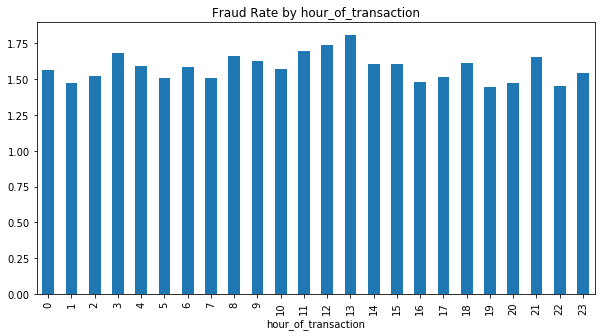

In [28]:
f, ax = plt.subplots(figsize=(10,5))
temp_df = in_df.groupby(['hour_of_transaction'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by hour_of_transaction");

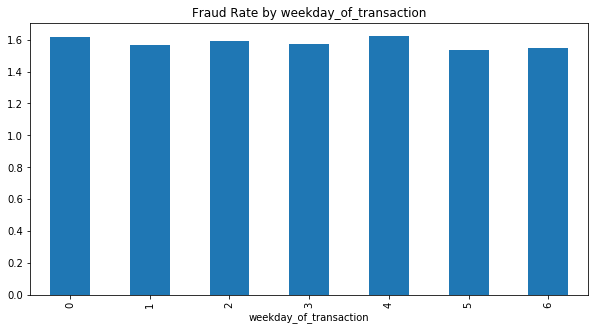

In [29]:
f, ax = plt.subplots(figsize=(10,5))
temp_df = in_df.groupby(['weekday_of_transaction'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by weekday_of_transaction");

# Observation
- Hour of transaction:
There are certain hours when fraud rate is little higher than the others (11 AM-1 AM) but mostly, it is not hugely different from average fraud rate (1.5%).
- Weekday of transaction:
 There is not much variability of fraud rate in any section of the weekday of the transaction. Essentially, the chances of fraud or non-fraud transactions don't vary by weekday of transaction much.  

 I had created time since last transaction columns previously, so I will explore them now.

Max HoursSinceLastTransaction is= 7875.848888888888
Min HoursSinceLastTransaction is= 0.0


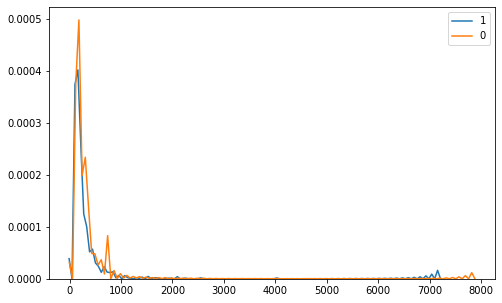

In [30]:
plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

sns.distplot(target_1[['HoursSinceLastTransaction']], label=1, hist=False, rug=False)
sns.distplot(target_0[['HoursSinceLastTransaction']], label=0, hist=False, rug=False);

print("Max HoursSinceLastTransaction is=", in_df['HoursSinceLastTransaction'].max())
print("Min HoursSinceLastTransaction is=",in_df['HoursSinceLastTransaction'].min())

Max DaysSinceLastTransaction is= 328.16037037037034
Min DaysSinceLastTransaction is= 0.0


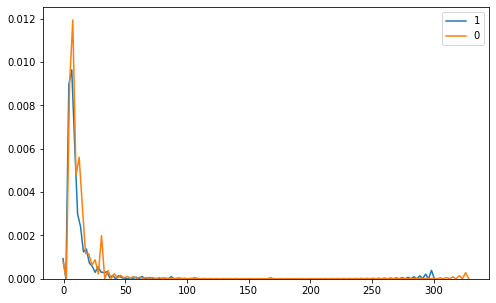

In [31]:
plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

sns.distplot(target_1[['DaysSinceLastTransaction']], label=1, hist=False, rug=False)
sns.distplot(target_0[['DaysSinceLastTransaction']], label=0, hist=False, rug=False);

print("Max DaysSinceLastTransaction is=", in_df['DaysSinceLastTransaction'].max())
print("Min DaysSinceLastTransaction is=",in_df['DaysSinceLastTransaction'].min())

Max MinutesSinceLastTransaction is= 472550.9333333333
Min MinutesSinceLastTransaction is= 0.0


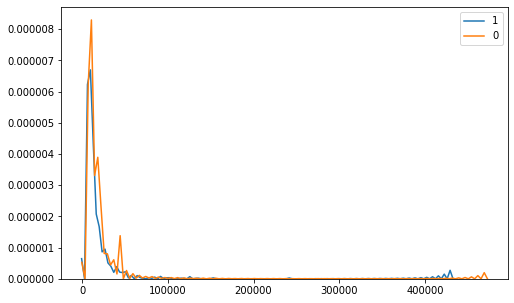

In [32]:
plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

sns.distplot(target_1[['MinutesSinceLastTransaction']], label=1, hist=False, rug=False)
sns.distplot(target_0[['MinutesSinceLastTransaction']], label=0, hist=False, rug=False);

print("Max MinutesSinceLastTransaction is=", in_df['MinutesSinceLastTransaction'].max())
print("Min MinutesSinceLastTransaction is=",in_df['MinutesSinceLastTransaction'].min())

Max SecondsSinceLastTransaction is= 28353055.999999996
Min SecondsSinceLastTransaction is= 0.0


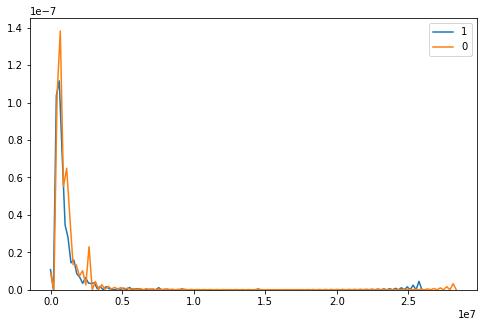

In [33]:
plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

sns.distplot(target_1[['SecondsSinceLastTransaction']], label=1, hist=False, rug=False)
sns.distplot(target_0[['SecondsSinceLastTransaction']], label=0, hist=False, rug=False);

print("Max SecondsSinceLastTransaction is=", in_df['SecondsSinceLastTransaction'].max())
print("Min SecondsSinceLastTransaction is=",in_df['SecondsSinceLastTransaction'].min())

# Observation
- Time since last transaction charts look exactly same across all the 4 measures since it was just a change of scaling between measures. 
I should have thought about that :)
- Anyway, the graph shows similar distribution of frauds as no-frauds except may be a small peak towards the end which could be immaterial. 

Next step in exploring date columns is to create following features:
- Age of the account days 
- Days left to expiry of the card
- days since last address changed 
and explore them at the same time. 

Fraud Rate by Age of the account
Max Age is= 9990 days
Min Age is= 1 days


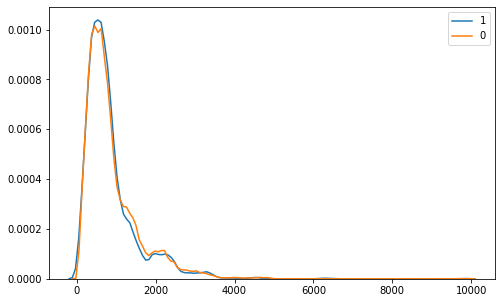

In [34]:
in_df['AgeAccountDays'] = (in_df['transactionDateTime']-in_df['accountOpenDate']).dt.days
plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

print("Fraud Rate by Age of the account")
print("Max Age is=", in_df['AgeAccountDays'].max(), "days")
print("Min Age is=",in_df['AgeAccountDays'].min(),"days")
sns.distplot(target_1[['AgeAccountDays']], label=1, hist=False, rug=False)
sns.distplot(target_0[['AgeAccountDays']], label=0, hist=False, rug=False);

I noticed that expiry date is in terms of month/year, so I would be creating months to card expiry

Fraud Rate by Months_to_Card_Expiry
Max Months_to_Card_Expiry is= 211
Min Months_to_Card_Expiry is= 36


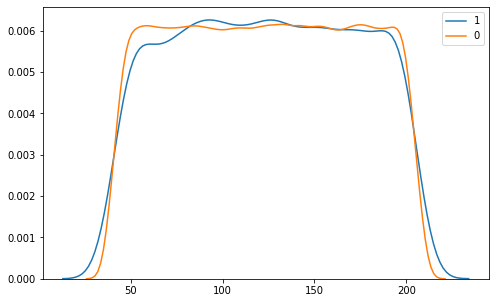

In [35]:
in_df['Months_to_Card_Expiry']=((in_df['currentExpDate']//100-in_df['transactionDateTime'].dt.year)*12)+(in_df['currentExpDate']%100-in_df['transactionDateTime'].dt.month)

plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

print("Fraud Rate by Months_to_Card_Expiry")
print("Max Months_to_Card_Expiry is=", in_df['Months_to_Card_Expiry'].max())
print("Min Months_to_Card_Expiry is=",in_df['Months_to_Card_Expiry'].min())
sns.distplot(target_1[['Months_to_Card_Expiry']], label=1, hist=False, rug=False)
sns.distplot(target_0[['Months_to_Card_Expiry']], label=0, hist=False, rug=False);

Fraud Rate by daysSinceAddressChanged
Max daysSinceAddressChanged is= 9990
Min daysSinceAddressChanged is= 0


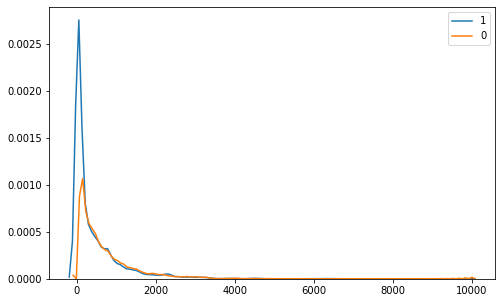

In [36]:
in_df['daysSinceAddressChanged'] = (in_df['transactionDateTime']-in_df['dateOfLastAddressChange']).dt.days
plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

print("Fraud Rate by daysSinceAddressChanged")
print("Max daysSinceAddressChanged is=", in_df['daysSinceAddressChanged'].max())
print("Min daysSinceAddressChanged is=",in_df['daysSinceAddressChanged'].min())
sns.distplot(target_1[['daysSinceAddressChanged']], label=1, hist=False, rug=False)
sns.distplot(target_0[['daysSinceAddressChanged']], label=0, hist=False, rug=False);

# Observation:
- The age of the account and months to card expiry shows overlapping distribution for both fraud and non-fraud in most part, so they may not be as signifant predictors. It will be interesting to see how they do in the model.  
- I am very excited to see distribution of 'days since address changed' with 'isFraud'. Days since address changed looks like having great differentiating power. Essentially, more fraud transactions are observed immediately after the address is changed. Thats' very interesting insight and I am interesting to see how this feature perform in the model

## Feature Engineering and Exploration: Numeric Columns
Looking at the numeric columns, I am planning to make use of following columns:
- enteredCVV and cardCVV: Use them to create an indicator if they match
- creditLimit, Current Balance and Available Balance: Use them to create columns like Utilization, and available money/current balance
- transactionAmount
- cardPresent and expirationDateKeyInMatch

Alongwith these features, I would like to create some features that capture information from past. It would require me to treat each transaction as sequential pattern, somewhat I did previously while creating 'time since last transaction' columns. So, essentially, I am thinking to create following columns for each account till that transaction point, so that current observations could be compared with past avgerages. With that in mind, the following columns will be created to roll up till previous transaction for each account, excluding the current ones. 

- Avg available Money till previous transaction
- Avg current balance till previous transaction
- Avg Utilization till previous transaction
- Avg transaction amount per transaction till previous transaction
- Avg transaction amount spent per day till previous transaction
- Avg count of transaction per day till previous transaction
- Count of transactions till previous transaction

Once we have these roll ups available till previous transactions, then the current transaction would be compared with previous roll ups to see if the deviation from previous pattern helps recognize fraud. 
So, may be a ratio column like:
- current transaction amount (Merchant Category='X')/avg transaction amount per transaction (Merchant Category and when isFraud=0)
- current utilization/avg utilization (till prev point)
- current balance/avg balance (till prev point)
- current available Money/Avg available Money (till prev point)

Another type of columns could be based on rolling window: transaction velocity and transaction acceleration which could be defined as:
- Transaction Velocity: Count of transactions/(per 3 days) Rolling window
- Transaction Acceleration: Increase/decrease of transaction velocity per transaction
- Transaction Momentum: Increase/decrease in transaction dollars per transaction (may be, by merchant category)

Lastly, I would like to create an indicator that captures if fraud was ever detected in past for the same account:
- past_isFraud: It will capture count of frauds in past for each account id (excluding the current fraud indicator)

Note that the above features require extensive QA, so I will have to be very careful as I create them

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

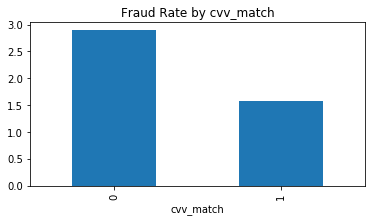

In [37]:
#Create CVV Match indicator and visualize it
in_df['cvv_match'] = np.where(in_df['cardCVV']== in_df['enteredCVV'], 1, 0)
f, ax = plt.subplots(figsize=(6,3))
temp_df = in_df.groupby(['cvv_match'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by cvv_match");

Fraud Rate by utilization of the credit limit
Max utilization is= 4.7222
Min utilization is= 0.0


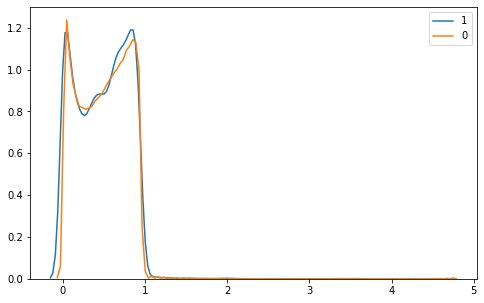

In [38]:
## Create Utilitization columns
in_df['utilization']=in_df['currentBalance']/in_df['creditLimit']
plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

print("Fraud Rate by utilization of the credit limit")
print("Max utilization is=", in_df['utilization'].max())
print("Min utilization is=",in_df['utilization'].min())
sns.distplot(target_1[['utilization']], label=1, hist=False, rug=False)
sns.distplot(target_0[['utilization']], label=0, hist=False, rug=False);

Fraud Rate by availableMoneyCreditLimitRatio
Max availableMoneyCreditLimitRatio is= 1.0
Min availableMoneyCreditLimitRatio is= -3.7222


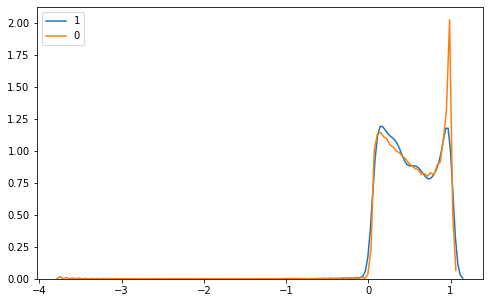

In [39]:
## Create Utilitization columns
in_df['availableMoneyCreditLimitRatio']=in_df['availableMoney']/in_df['creditLimit']
plt.figure(figsize=(8,5))
target_0 = in_df.loc[in_df['isFraud'] == 0]
target_1 = in_df.loc[in_df['isFraud'] == 1]

print("Fraud Rate by availableMoneyCreditLimitRatio")
print("Max availableMoneyCreditLimitRatio is=", in_df['availableMoneyCreditLimitRatio'].max())
print("Min availableMoneyCreditLimitRatio is=",in_df['availableMoneyCreditLimitRatio'].min())
sns.distplot(target_1[['availableMoneyCreditLimitRatio']], label=1, hist=False, rug=False)
sns.distplot(target_0[['availableMoneyCreditLimitRatio']], label=0, hist=False, rug=False);

The available money to credit limit ratio is same as 1-Utilization.When utilization goes over 1, available money goes negative. I should be able to keep just one of the two features and move forward. We will handle it during modelling section

Fraud Rate by transactionAmount
Max transactionAmount is= 2011.54
Min transactionAmount is= 0.0


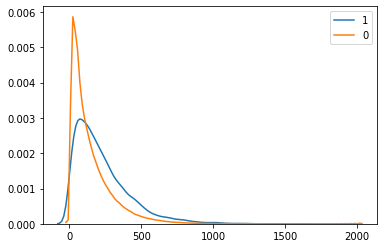

In [40]:
# Visualize transactionAmount feature
print("Fraud Rate by transactionAmount")
print("Max transactionAmount is=", in_df['transactionAmount'].max())
print("Min transactionAmount is=",in_df['transactionAmount'].min())
sns.distplot(target_1[['transactionAmount']], label=1, hist=False, rug=False)
sns.distplot(target_0[['transactionAmount']], label=0, hist=False, rug=False);

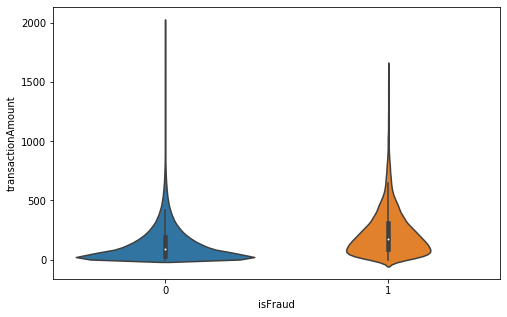

In [41]:
plt.figure(figsize=(8,5))
sns.violinplot(x='isFraud', y='transactionAmount', data=in_df);

The above two graphs show that fraud transaction amount have fatter tail than non-fraud transaction amount even though they both peak around the same dollar amount. Lets look it little bit more closely.

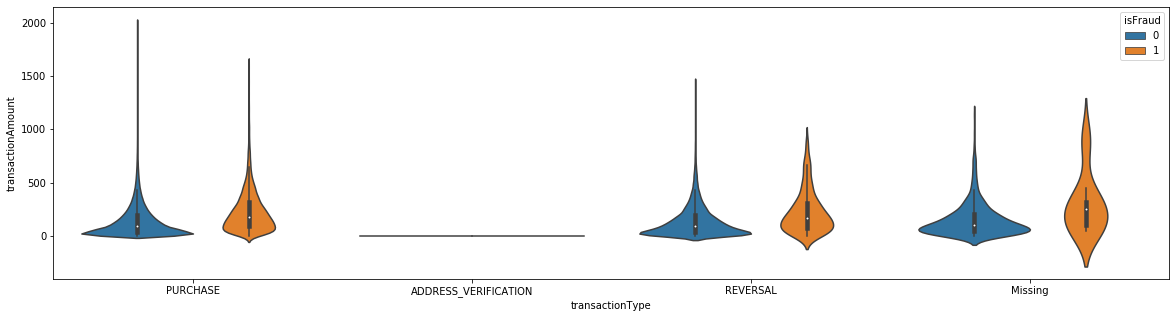

In [42]:
plt.figure(figsize=(20,5))
sns.violinplot(x='transactionType', y='transactionAmount', data=in_df, hue='isFraud');

I see violin plot can be pretty handy to visualize transaction amount by transaction type for each fraud and non-fraud transactions. For the cases, where transaction Type is missing, the transaction amount has fatter tails for fraud transactions than non-frauds. It essentially implies that fraudsters are swiping big transaction amount when transaction type is missing. So, if transaction type is missing, and transaction amount is big, it is more likely to be a fraud transaction than non-fraud. Similar pattern is observed for transaction type='REVERSAL' and 'PURCHASE' but not as prominent as it was observed for transactionType='missing'. For transactionType='ADDRESS_VERIFICATION' it seems like there is no transaction amount involved. 

Now, we will calculate some cumulative fetures since transactions are sequential. My first goal is to see if current transaction amount is much different from avg transaction amount that customer has made in past. However, since transaction amount can significantly vary depending on the category in which transaction is made, therefore we will need to compare current transaction amount in category 'X' with avg transaction amout in category 'X'. 
That said, some customer may be new and will not have enough transaction history in each category to deduce an avg transaction amount. Further, for the ones that are customer for long time, we don't have their lifetime aggregates in the data to see their life time averages. One way to handle it would be to look at overall population's avg transaction amount for each transaction in each category for non-fraud cases and see if current transaction amount is any different.

In [43]:
#Count and sum of non-fraud transaction amount in each merchant category for entire population
temp_df = pd.DataFrame()
## Group by merchant category only and take the avg of 
#temp_df['avgTransactionAmtMC'] = in_df[in_df['isFraud']==0].groupby(['merchantCategoryCode'])['transactionAmount'].sum()/in_df[in_df['isFraud']==0].groupby(['merchantCategoryCode'])['transactionDateTime'].count()
temp_df['avgTransactionAmtMC'] = in_df[in_df['isFraud']==0].groupby(['merchantCategoryCode'])['transactionAmount'].mean()
print(temp_df)

                      avgTransactionAmtMC
merchantCategoryCode                     
airline                           142.669
auto                              143.920
cable/phone                        97.288
entertainment                     145.598
fastfood                          145.249
food                              144.426
food_delivery                      53.156
fuel                               45.181
furniture                         144.371
gym                                33.466
health                            145.179
hotels                            145.060
mobileapps                          5.837
online_gifts                      143.653
online_retail                     142.847
online_subscriptions               14.579
personal care                     147.450
rideshare                         143.919
subscriptions                     146.122


In [44]:
#in_df=in_df.drop(['avgTransactionAmtMC_x','avgTransactionAmtMC_y'],axis=1)
temp_df = pd.DataFrame(temp_df)
#in_df = in_df.drop(['avgTransactionAmtMC','avgTransactionAmtMC_x','avgTransactionAmtMC_y'],axis=1)
in_df = pd.merge(in_df, temp_df, on='merchantCategoryCode')
in_df['ratioAmtMC_Customer_Total']=in_df['transactionAmount']/in_df['avgTransactionAmtMC']

In [45]:
in_df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,MinutesSinceLastTransaction,SecondsSinceLastTransaction,hour_of_transaction,weekday_of_transaction,AgeAccountDays,Months_to_Card_Expiry,daysSinceAddressChanged,cvv_match,utilization,availableMoneyCreditLimitRatio,avgTransactionAmtMC,ratioAmtMC_Customer_Total
0,999389635,999389635,5000,5000.00,2016-02-09 14:23:41,101.46,target.com,US,US,05,01,online_retail,201912,2015-10-09,2015-10-09,140,140,3991,PURCHASE,0.00,0,0,0,NaN,NaN,NaN,NaN,14,1,123,46,123,1,0.000e+00,1.000,142.847,0.710
1,999389635,999389635,5000,4943.92,2016-08-04 20:27:36,42.98,oldnavy.com,US,US,09,01,online_retail,202307,2015-10-09,2015-10-09,140,140,3991,PURCHASE,56.08,0,0,0,13.791,330.991,19859.433,1.192e+06,20,3,300,83,300,1,1.122e-02,0.989,142.847,0.301
2,999283629,999283629,2500,2498.66,2016-01-04 04:12:22,37.60,cheapfast.com,US,US,02,08,online_retail,202012,2015-11-08,2015-11-08,919,919,4157,PURCHASE,1.34,0,0,0,2.476,59.432,3565.917,2.140e+05,4,0,57,59,57,1,5.360e-04,0.999,142.847,0.263
3,999283629,999283629,2500,2461.06,2016-01-04 16:53:57,112.24,discount.com,US,US,02,01,online_retail,202801,2015-11-08,2015-11-08,489,489,3016,PURCHASE,38.94,0,0,0,0.529,12.693,761.583,4.570e+04,16,0,57,144,57,1,1.558e-02,0.984,142.847,0.786
4,999283629,999283629,2500,2238.12,2016-01-07 21:00:05,0.00,alibaba.com,US,US,09,01,online_retail,203003,2015-11-08,2015-11-08,489,489,3016,ADDRESS_VERIFICATION,261.88,0,0,0,0.461,11.057,663.433,3.981e+04,21,3,60,170,60,1,1.048e-01,0.895,142.847,0.000
5,999283629,999283629,2500,2238.12,2016-01-13 00:09:50,346.04,staples.com,US,US,05,01,online_retail,203010,2015-11-08,2015-11-08,489,489,3016,PURCHASE,261.88,0,0,0,5.132,123.162,7389.750,4.434e+05,0,2,66,177,66,1,1.048e-01,0.895,142.847,2.422
6,999283629,999283629,2500,1892.08,2016-01-13 15:52:07,5.88,apple.com,US,US,09,01,online_retail,203109,2015-11-08,2015-11-08,489,489,3016,PURCHASE,607.92,0,0,0,0.654,15.705,942.283,5.654e+04,15,2,66,188,66,1,2.432e-01,0.757,142.847,0.041
7,999283629,999283629,2500,1886.20,2016-01-17 08:52:23,505.43,staples.com,US,US,05,08,online_retail,202709,2015-11-08,2015-11-08,919,919,4157,PURCHASE,613.80,0,0,0,3.709,89.004,5340.267,3.204e+05,8,6,70,140,70,1,2.455e-01,0.754,142.847,3.538
8,999283629,999283629,2500,1380.77,2016-01-19 21:21:34,396.29,alibaba.com,US,US,05,99,online_retail,202206,2015-11-08,2015-11-08,489,489,3016,PURCHASE,1119.23,0,0,0,2.520,60.486,3629.183,2.178e+05,21,1,72,77,72,1,4.477e-01,0.552,142.847,2.774
9,999283629,999283629,2500,880.53,2016-01-25 19:19:26,84.60,target.com,US,US,02,01,online_retail,202908,2015-11-08,2015-11-08,489,489,3016,PURCHASE,1619.47,0,0,0,2.874,68.969,4138.133,2.483e+05,19,0,78,163,78,1,6.478e-01,0.352,142.847,0.592


In [46]:
#Count of transaction and sum of transaction amount in each merchant category by each customer till previous transaction when isFraud=0
#First sort the data 
in_df = in_df.sort_values(["accountNumber", "transactionDateTime"], ascending = (False, True))
in_df['avgTransactionAmountCustomerMC']=(in_df[in_df['isFraud']==0].groupby(['accountNumber','merchantCategoryCode'])['transactionAmount'].cumsum()-in_df['transactionAmount'])/(in_df[in_df['isFraud']==0].groupby(['accountNumber','merchantCategoryCode'])['transactionDateTime'].cumcount())
in_df['ratioAmtMC_Customer']=in_df['transactionAmount']/in_df['avgTransactionAmountCustomerMC']

in_df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,MinutesSinceLastTransaction,SecondsSinceLastTransaction,hour_of_transaction,weekday_of_transaction,AgeAccountDays,Months_to_Card_Expiry,daysSinceAddressChanged,cvv_match,utilization,availableMoneyCreditLimitRatio,avgTransactionAmtMC,ratioAmtMC_Customer_Total,avgTransactionAmountCustomerMC,ratioAmtMC_Customer
0,999389635,999389635,5000,5000.00,2016-02-09 14:23:41,101.46,target.com,US,US,05,01,online_retail,201912,2015-10-09,2015-10-09,140,140,3991,PURCHASE,0.00,0,0,0,NaN,NaN,NaN,NaN,14,1,123,46,123,1,0.000,1.000,142.847,0.710,NaN,NaN
202156,999389635,999389635,5000,4923.54,2016-07-22 01:28:10,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,76.46,0,0,0,163.461,3923.075,235384.483,1.412e+07,1,4,287,201,287,1,0.015,0.985,5.837,0.791,NaN,NaN
1,999389635,999389635,5000,4943.92,2016-08-04 20:27:36,42.98,oldnavy.com,US,US,09,01,online_retail,202307,2015-10-09,2015-10-09,140,140,3991,PURCHASE,56.08,0,0,0,13.791,330.991,19859.433,1.192e+06,20,3,300,83,300,1,0.011,0.989,142.847,0.301,101.46,0.424
202157,999389635,999389635,5000,4900.94,2016-08-22 11:42:48,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,99.06,0,0,0,17.636,423.253,25395.200,1.524e+06,11,0,318,200,318,1,0.020,0.980,5.837,0.791,4.62,1.000
217146,999389635,999389635,5000,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,US,US,09,01,food,203202,2015-10-09,2015-10-09,140,140,3991,PURCHASE,78.68,1,0,0,25.162,603.877,36232.600,2.174e+06,15,4,343,185,343,1,0.016,0.984,144.426,1.853,NaN,NaN
202158,999389635,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,346.30,0,0,0,5.933,142.385,8543.100,5.126e+05,13,3,349,199,349,1,0.069,0.931,5.837,0.791,4.62,1.000
202159,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,325.92,0,0,0,31.117,746.820,44809.183,2.689e+06,16,6,380,198,380,1,0.065,0.935,5.837,0.791,4.62,1.000
202160,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,305.54,0,0,0,31.315,751.568,45094.083,2.706e+06,0,3,412,197,412,1,0.061,0.939,5.837,0.791,4.62,1.000
202161,999389635,999389635,5000,4714.84,2016-12-24 05:19:30,4.62,Play Store,US,US,05,01,mobileapps,203304,2015-10-09,2015-10-09,140,140,3991,PURCHASE,285.16,0,0,0,30.207,724.962,43497.733,2.610e+06,5,5,442,196,442,1,0.057,0.943,5.837,0.791,4.62,1.000
292636,999283629,999283629,2500,2500.00,2016-01-01 16:46:27,1.34,Icelandic Airlines,US,US,09,01,airline,202301,2015-11-08,2015-11-08,489,489,3016,PURCHASE,0.00,0,0,0,NaN,NaN,NaN,NaN,16,4,54,84,54,1,0.000,1.000,142.669,0.009,NaN,NaN


In [47]:
#transaction Velocity (count of transactions) and momentum (Avg transaction amount) calculation over 1 day, 3 days, and 7 days

in_df.index = pd.DatetimeIndex(in_df.transactionDateTime)
in_df = in_df.sort_index()

# over 1 day
_grouped_count = in_df.groupby("accountNumber").rolling('1D',on='transactionDateTime').transactionAmount.count()
_grouped_avg=in_df.groupby("accountNumber").rolling('1D',on='transactionDateTime').transactionAmount.mean()
df_1d_count = pd.DataFrame(_grouped_count)
df_1d_count = df_1d_count.rename(columns={"transactionAmount":"countTransaction_L1D"})
df_1d_mean = pd.DataFrame(_grouped_avg)
df_1d_mean = df_1d_mean.rename(columns={"transactionAmount":"avgTransactionAmt_L1D"})

# over 3 days
_grouped_count = in_df.groupby("accountNumber").rolling('3D',on='transactionDateTime').transactionAmount.count()
_grouped_avg=in_df.groupby("accountNumber").rolling('3D',on='transactionDateTime').transactionAmount.mean()
df_3d_count = pd.DataFrame(_grouped_count)
df_3d_count = df_3d_count.rename(columns={"transactionAmount":"countTransaction_L3D"})
df_3d_mean = pd.DataFrame(_grouped_avg)
df_3d_mean = df_3d_mean.rename(columns={"transactionAmount":"avgTransactionAmt_L3D"})

# over 7 days
_grouped_count = in_df.groupby("accountNumber").rolling('7D',on='transactionDateTime').transactionAmount.count()
_grouped_avg=in_df.groupby("accountNumber").rolling('7D',on='transactionDateTime').transactionAmount.mean()
df_7d_count = pd.DataFrame(_grouped_count)
df_7d_count = df_7d_count.rename(columns={"transactionAmount":"countTransaction_L7D"})
df_7d_mean = pd.DataFrame(_grouped_avg)
df_7d_mean = df_7d_mean.rename(columns={"transactionAmount":"avgTransactionAmt_L7D"})

In [48]:
df_1d_count.head(10)

countTransaction_L1D
accountNumber transactionDateTime                      
100088067     2016-01-12 00:59:52                   1.0
              2016-01-12 19:49:41                   2.0
              2016-01-17 15:41:46                   1.0
              2016-02-02 19:57:18                   1.0
              2016-02-03 04:48:54                   2.0
              2016-02-08 06:09:12                   1.0
              2016-02-09 18:36:53                   1.0
              2016-02-09 23:44:13                   2.0
              2016-02-13 20:17:41                   1.0
              2016-02-21 01:14:56                   1.0

In [49]:
# Index is being taken off to avoid error in log which does not allow index to be used as column
in_df.index.name = None
#Merge all the tables together into one dataframe and check each time after merge
m_df=in_df
m_df = pd.merge(m_df, df_1d_count, on=['accountNumber','transactionDateTime'])
m_df = pd.merge(m_df, df_1d_mean, on=['accountNumber','transactionDateTime'])
m_df = pd.merge(m_df, df_3d_count, on=['accountNumber','transactionDateTime'])
m_df = pd.merge(m_df, df_3d_mean, on=['accountNumber','transactionDateTime'])
m_df = pd.merge(m_df, df_7d_count, on=['accountNumber','transactionDateTime'])
m_df = pd.merge(m_df, df_7d_mean, on=['accountNumber','transactionDateTime'])

In [50]:
m_df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,MinutesSinceLastTransaction,SecondsSinceLastTransaction,hour_of_transaction,weekday_of_transaction,AgeAccountDays,Months_to_Card_Expiry,daysSinceAddressChanged,cvv_match,utilization,availableMoneyCreditLimitRatio,avgTransactionAmtMC,ratioAmtMC_Customer_Total,avgTransactionAmountCustomerMC,ratioAmtMC_Customer,countTransaction_L1D,avgTransactionAmt_L1D,countTransaction_L3D,avgTransactionAmt_L3D,countTransaction_L7D,avgTransactionAmt_L7D
0,419104777,419104777,50000,50000.0,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,01,subscriptions,202803,2015-05-30,2015-05-30,837,837,5010,PURCHASE,0.0,0,0,0,NaN,NaN,NaN,NaN,0,4,216,146,216,1,0.0,1.0,146.122,0.302,NaN,NaN,1.0,44.09,1.0,44.09,1.0,44.09
1,674577133,674577133,5000,5000.0,2016-01-01 00:01:44,329.57,staples.com,US,US,09,08,online_retail,202410,2015-08-19,2015-08-19,430,430,1693,PURCHASE,0.0,0,0,0,NaN,NaN,NaN,NaN,0,4,135,105,135,1,0.0,1.0,142.847,2.307,NaN,NaN,1.0,329.57,1.0,329.57,1.0,329.57
2,958438658,958438658,20000,20000.0,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,05,01,online_retail,202304,2013-07-20,2013-07-20,445,445,2062,PURCHASE,0.0,0,0,0,NaN,NaN,NaN,NaN,0,4,895,87,895,1,0.0,1.0,142.847,1.152,NaN,NaN,1.0,164.57,1.0,164.57,1.0,164.57
3,851126461,851126461,10000,10000.0,2016-01-01 00:02:04,122.83,discount.com,US,US,02,08,online_retail,202507,2014-10-18,2014-10-18,667,667,7359,PURCHASE,0.0,0,0,0,NaN,NaN,NaN,NaN,0,4,440,114,440,1,0.0,1.0,142.847,0.860,NaN,NaN,1.0,122.83,1.0,122.83,1.0,122.83
4,148963316,148963316,2500,2500.0,2016-01-01 00:02:19,0.00,Fast Repair,US,US,05,01,auto,202612,2013-12-12,2013-12-12,542,542,1785,ADDRESS_VERIFICATION,0.0,0,0,0,NaN,NaN,NaN,NaN,0,4,750,131,750,1,0.0,1.0,143.920,0.000,NaN,NaN,1.0,0.00,1.0,0.00,1.0,0.00
5,974901832,974901832,250,250.0,2016-01-01 00:03:47,24.56,staples.com,US,US,05,01,online_retail,203205,2012-05-29,2012-05-29,290,290,9744,PURCHASE,0.0,0,0,0,NaN,NaN,NaN,NaN,0,4,1312,196,1312,1,0.0,1.0,142.847,0.172,NaN,NaN,1.0,24.56,1.0,24.56,1.0,24.56
6,811942128,811942128,5000,5000.0,2016-01-01 00:04:10,20.45,sears.com,US,US,02,01,online_retail,202908,2015-05-23,2015-05-23,948,948,4888,PURCHASE,0.0,0,0,1,NaN,NaN,NaN,NaN,0,4,223,163,223,1,0.0,1.0,142.847,0.143,NaN,NaN,1.0,20.45,1.0,20.45,1.0,20.45
7,380680241,380680241,5000,5000.0,2016-01-01 00:06:17,96.68,Fresh Flowers,US,US,05,01,online_gifts,202308,2014-06-21,2014-06-21,869,869,593,PURCHASE,0.0,0,0,0,NaN,NaN,NaN,NaN,0,4,559,91,559,1,0.0,1.0,143.653,0.673,NaN,NaN,1.0,96.68,1.0,96.68,1.0,96.68
8,676919786,676919786,250,250.0,2016-01-01 00:06:46,146.57,Dairy Queen #766986,US,US,05,01,fastfood,202012,2015-08-11,2015-08-11,111,111,3690,PURCHASE,0.0,1,0,0,NaN,NaN,NaN,NaN,0,4,143,59,143,1,0.0,1.0,145.249,1.009,NaN,NaN,1.0,146.57,1.0,146.57,1.0,146.57
9,588383631,588383631,5000,5000.0,2016-01-01 00:07:03,227.62,discount.com,US,US,02,01,online_retail,202109,2012-11-15,2012-11-15,792,792,557,PURCHASE,0.0,0,0,0,NaN,NaN,NaN,NaN,0,4,1142,68,1142,1,0.0,1.0,142.847,1.593,NaN,NaN,1.0,227.62,1.0,227.62,1.0,227.62


In [51]:
#Calculate long term avg transaction velocity
#m_df=m_df.drop(['avgCountTransaction_L1D','avgCountTransaction_L3D','avgCountTransaction_L7D',
#                'avgAvgTransactionAmt_L1D','avgAvgTransactionAmt_L3D','avgAvgTransactionAmt_L7D',
#              'ratioCountTransaction_L1D','ratioCountTransaction_L3D','ratioCountTransaction_L7D',
#               'ratioTransactionAmt_L1D','ratioTransactionAmt_L3D','ratioTransactionAmt_L7D'],axis=1)
temp_df=pd.DataFrame()
temp_df['avgCountTransaction_L1D']=m_df.groupby('accountNumber')['countTransaction_L1D'].mean()
temp_df['avgCountTransaction_L3D']=m_df.groupby('accountNumber')['countTransaction_L3D'].mean()
temp_df['avgCountTransaction_L7D']=m_df.groupby('accountNumber')['countTransaction_L7D'].mean()

#Calculate long term avg transaction momentum
temp_df['avgAvgTransactionAmt_L1D']=m_df.groupby('accountNumber')['avgTransactionAmt_L1D'].mean()
temp_df['avgAvgTransactionAmt_L3D']=m_df.groupby('accountNumber')['avgTransactionAmt_L3D'].mean()
temp_df['avgAvgTransactionAmt_L7D']=m_df.groupby('accountNumber')['avgTransactionAmt_L7D'].mean()

m_df = pd.merge(m_df, temp_df, on=['accountNumber'])

#Calculate ratios
m_df['ratioCountTransaction_L1D']=m_df['countTransaction_L1D']/m_df['avgCountTransaction_L1D']
m_df['ratioCountTransaction_L3D']=m_df['countTransaction_L3D']/m_df['avgCountTransaction_L3D']
m_df['ratioCountTransaction_L7D']=m_df['countTransaction_L7D']/m_df['avgCountTransaction_L7D']

m_df['ratioTransactionAmt_L1D']=m_df['avgTransactionAmt_L1D']/m_df['avgAvgTransactionAmt_L1D']
m_df['ratioTransactionAmt_L3D']=m_df['avgTransactionAmt_L3D']/m_df['avgAvgTransactionAmt_L3D']
m_df['ratioTransactionAmt_L7D']=m_df['avgTransactionAmt_L7D']/m_df['avgAvgTransactionAmt_L7D']

In [52]:
m_df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,...,cvv_match,utilization,availableMoneyCreditLimitRatio,avgTransactionAmtMC,ratioAmtMC_Customer_Total,avgTransactionAmountCustomerMC,ratioAmtMC_Customer,countTransaction_L1D,avgTransactionAmt_L1D,countTransaction_L3D,avgTransactionAmt_L3D,countTransaction_L7D,avgTransactionAmt_L7D,avgCountTransaction_L1D,avgCountTransaction_L3D,avgCountTransaction_L7D,avgAvgTransactionAmt_L1D,avgAvgTransactionAmt_L3D,avgAvgTransactionAmt_L7D,ratioCountTransaction_L1D,ratioCountTransaction_L3D,ratioCountTransaction_L7D,ratioTransactionAmt_L1D,ratioTransactionAmt_L3D,ratioTransactionAmt_L7D
0,419104777,419104777,50000,50000.00,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,01,subscriptions,202803,2015-05-30,2015-05-30,837,837,5010,PURCHASE,0.00,0,0,0,NaN,NaN,...,1,0.000,1.000,146.122,0.302,NaN,NaN,1.0,44.09,1.0,44.090,1.0,44.090,1.141,1.551,2.462,107.028,110.151,105.648,0.876,0.645,0.406,0.412,0.400,0.417
1,419104777,419104777,50000,50000.00,2016-02-05 16:47:09,473.83,Regal Cinemas #05791,US,US,05,01,entertainment,202911,2015-05-30,2015-05-30,837,837,5010,PURCHASE,0.00,1,0,0,35.699,856.769,...,1,0.000,1.000,145.598,3.254,NaN,NaN,1.0,473.83,1.0,473.830,1.0,473.830,1.141,1.551,2.462,107.028,110.151,105.648,0.876,0.645,0.406,4.427,4.302,4.485
2,419104777,419104777,50000,49526.17,2016-02-12 15:37:19,14.82,AMC #128743,US,US,02,01,entertainment,203301,2015-05-30,2015-05-30,837,837,5010,PURCHASE,473.83,1,0,0,6.952,166.836,...,1,0.009,0.991,145.598,0.102,473.830,0.031,1.0,14.82,1.0,14.820,2.0,244.325,1.141,1.551,2.462,107.028,110.151,105.648,0.876,0.645,0.812,0.138,0.135,2.313
3,419104777,419104777,50000,49511.35,2016-02-13 23:20:26,307.23,AMC #145832,US,US,02,01,entertainment,203108,2015-05-30,2015-05-30,640,640,7979,PURCHASE,488.65,1,0,0,1.322,31.719,...,1,0.010,0.990,145.598,2.110,244.325,1.257,1.0,307.23,2.0,161.025,2.0,161.025,1.141,1.551,2.462,107.028,110.151,105.648,0.876,1.289,0.812,2.871,1.462,1.524
4,419104777,419104777,50000,49204.12,2016-02-19 13:16:43,50.57,AMC #552863,US,US,09,08,entertainment,202905,2015-05-30,2015-05-30,837,837,5010,PURCHASE,795.88,1,0,0,5.581,133.938,...,1,0.016,0.984,145.598,0.347,265.293,0.191,1.0,50.57,1.0,50.570,3.0,124.207,1.141,1.551,2.462,107.028,110.151,105.648,0.876,0.645,1.219,0.472,0.459,1.176


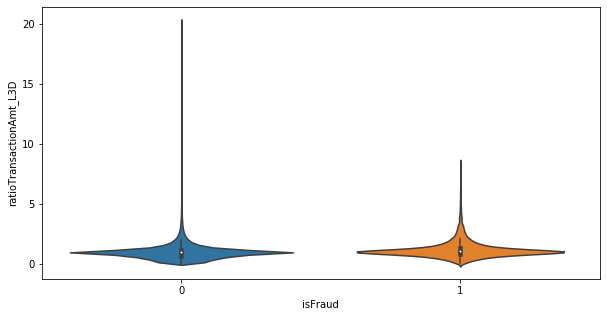

In [53]:
plt.figure(figsize=(10,5))
#sns.violinplot(x='isFraud', y='countTransaction_L3D', data=m_df, hue='isFraud');
sns.violinplot(x='isFraud', y='ratioTransactionAmt_L3D', data=m_df);

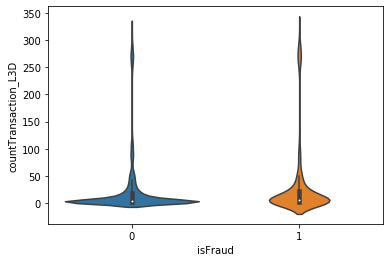

In [54]:
sns.violinplot(x='isFraud', y='countTransaction_L3D', data=m_df);

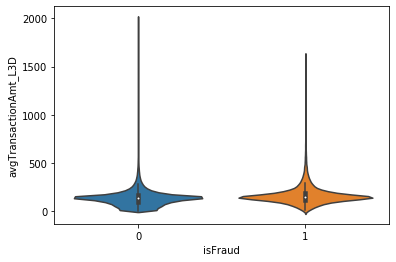

In [55]:
sns.violinplot(x='isFraud', y='avgTransactionAmt_L3D', data=m_df);

Fraud Rate by countTransaction_L3D
Max countTransaction_L3D is= 328.0
Min countTransaction_L3D is= 1.0


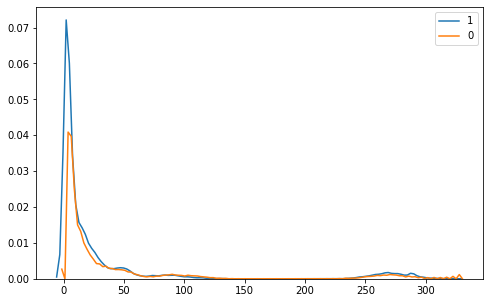

In [56]:

plt.figure(figsize=(8,5))
target_0 = m_df.loc[m_df['isFraud'] == 0]
target_1 = m_df.loc[m_df['isFraud'] == 1]

print("Fraud Rate by countTransaction_L3D")
print("Max countTransaction_L3D is=", m_df['countTransaction_L3D'].max())
print("Min countTransaction_L3D is=",m_df['countTransaction_L3D'].min())
sns.distplot(target_1[['countTransaction_L3D']], label=1, hist=False, rug=False)
sns.distplot(target_0[['countTransaction_L3D']], label=0, hist=False, rug=False);

Fraud Rate by ratioCountTransaction_L3D
Max ratioCountTransaction_L3D is= 4.302083333333333
Min ratioCountTransaction_L3D is= 0.003708916047526555


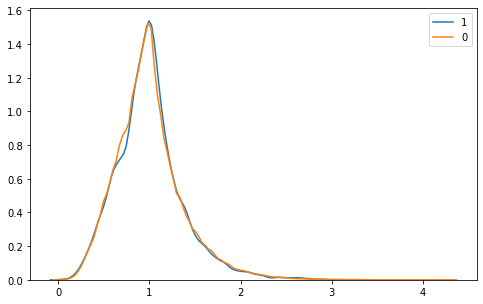

In [57]:

plt.figure(figsize=(8,5))
target_0 = m_df.loc[m_df['isFraud'] == 0]
target_1 = m_df.loc[m_df['isFraud'] == 1]

print("Fraud Rate by ratioCountTransaction_L3D")
print("Max ratioCountTransaction_L3D is=", m_df['ratioCountTransaction_L3D'].max())
print("Min ratioCountTransaction_L3D is=",m_df['ratioCountTransaction_L3D'].min())
sns.distplot(target_1[['ratioCountTransaction_L3D']], label=1, hist=False, rug=False)
sns.distplot(target_0[['ratioCountTransaction_L3D']], label=0, hist=False, rug=False);


Max countTransaction_L1D is= 126.0
Min countTransaction_L1D is= 1.0


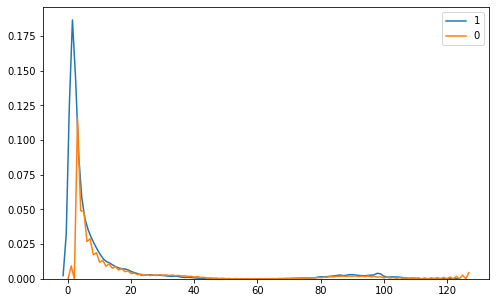

In [58]:
plt.figure(figsize=(8,5))
target_0 = m_df.loc[m_df['isFraud'] == 0]
target_1 = m_df.loc[m_df['isFraud'] == 1]

sns.distplot(target_1[['countTransaction_L1D']], label=1, hist=False, rug=False)
sns.distplot(target_0[['countTransaction_L1D']], label=0, hist=False, rug=False);

print("Max countTransaction_L1D is=", m_df['countTransaction_L1D'].max())
print("Min countTransaction_L1D is=",m_df['countTransaction_L1D'].min())

Max cumsumCountTransaction is= 35370
Min cumsumCountTransaction is= 1


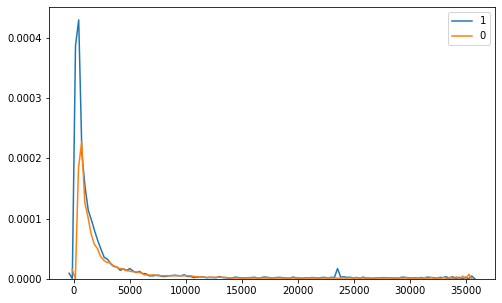

In [59]:
m_df['cumsumCountTransaction']=m_df.groupby(['accountNumber'])['transactionDateTime'].cumcount()+1
plt.figure(figsize=(8,5))
target_0 = m_df.loc[m_df['isFraud'] == 0]
target_1 = m_df.loc[m_df['isFraud'] == 1]

sns.distplot(target_1[['cumsumCountTransaction']], label=1, hist=False, rug=False)
sns.distplot(target_0[['cumsumCountTransaction']], label=0, hist=False, rug=False);

print("Max cumsumCountTransaction is=", m_df['cumsumCountTransaction'].max())
print("Min cumsumCountTransaction is=",m_df['cumsumCountTransaction'].min())

In [60]:
m_df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,DaysSinceLastTransaction,HoursSinceLastTransaction,...,utilization,availableMoneyCreditLimitRatio,avgTransactionAmtMC,ratioAmtMC_Customer_Total,avgTransactionAmountCustomerMC,ratioAmtMC_Customer,countTransaction_L1D,avgTransactionAmt_L1D,countTransaction_L3D,avgTransactionAmt_L3D,countTransaction_L7D,avgTransactionAmt_L7D,avgCountTransaction_L1D,avgCountTransaction_L3D,avgCountTransaction_L7D,avgAvgTransactionAmt_L1D,avgAvgTransactionAmt_L3D,avgAvgTransactionAmt_L7D,ratioCountTransaction_L1D,ratioCountTransaction_L3D,ratioCountTransaction_L7D,ratioTransactionAmt_L1D,ratioTransactionAmt_L3D,ratioTransactionAmt_L7D,cumsumCountTransaction
0,419104777,419104777,50000,50000.00,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,01,subscriptions,202803,2015-05-30,2015-05-30,837,837,5010,PURCHASE,0.00,0,0,0,NaN,NaN,...,0.000,1.000,146.122,0.302,NaN,NaN,1.0,44.09,1.0,44.090,1.0,44.090,1.141,1.551,2.462,107.028,110.151,105.648,0.876,0.645,0.406,0.412,0.400,0.417,1
1,419104777,419104777,50000,50000.00,2016-02-05 16:47:09,473.83,Regal Cinemas #05791,US,US,05,01,entertainment,202911,2015-05-30,2015-05-30,837,837,5010,PURCHASE,0.00,1,0,0,35.699,856.769,...,0.000,1.000,145.598,3.254,NaN,NaN,1.0,473.83,1.0,473.830,1.0,473.830,1.141,1.551,2.462,107.028,110.151,105.648,0.876,0.645,0.406,4.427,4.302,4.485,2
2,419104777,419104777,50000,49526.17,2016-02-12 15:37:19,14.82,AMC #128743,US,US,02,01,entertainment,203301,2015-05-30,2015-05-30,837,837,5010,PURCHASE,473.83,1,0,0,6.952,166.836,...,0.009,0.991,145.598,0.102,473.830,0.031,1.0,14.82,1.0,14.820,2.0,244.325,1.141,1.551,2.462,107.028,110.151,105.648,0.876,0.645,0.812,0.138,0.135,2.313,3
3,419104777,419104777,50000,49511.35,2016-02-13 23:20:26,307.23,AMC #145832,US,US,02,01,entertainment,203108,2015-05-30,2015-05-30,640,640,7979,PURCHASE,488.65,1,0,0,1.322,31.719,...,0.010,0.990,145.598,2.110,244.325,1.257,1.0,307.23,2.0,161.025,2.0,161.025,1.141,1.551,2.462,107.028,110.151,105.648,0.876,1.289,0.812,2.871,1.462,1.524,4
4,419104777,419104777,50000,49204.12,2016-02-19 13:16:43,50.57,AMC #552863,US,US,09,08,entertainment,202905,2015-05-30,2015-05-30,837,837,5010,PURCHASE,795.88,1,0,0,5.581,133.938,...,0.016,0.984,145.598,0.347,265.293,0.191,1.0,50.57,1.0,50.570,3.0,124.207,1.141,1.551,2.462,107.028,110.151,105.648,0.876,0.645,1.219,0.472,0.459,1.176,5


Max countTransaction_L1D when (cumsumCountTransaction>=40) is= 126.0
Min countTransaction_L1D when (cumsumCountTransaction>=40) is= 1.0


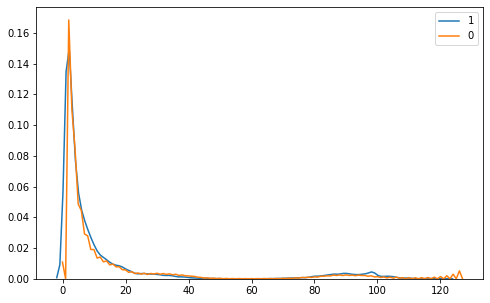

In [61]:
plt.figure(figsize=(8,5))
target_0 = m_df.loc[(m_df['isFraud'] == 0)& (m_df['cumsumCountTransaction']>=40)]
target_1 = m_df.loc[(m_df['isFraud'] == 1)&(m_df['cumsumCountTransaction'] >=40)]

sns.distplot(target_1[['countTransaction_L1D']], label=1, hist=False, rug=False)
sns.distplot(target_0[['countTransaction_L1D']], label=0, hist=False, rug=False);

print("Max countTransaction_L1D when (cumsumCountTransaction>=40) is=", m_df['countTransaction_L1D'].max())
print("Min countTransaction_L1D when (cumsumCountTransaction>=40) is=",m_df['countTransaction_L1D'].min())

Creating count of past frauds by apply cumsum function on isFraud and remvoing the fraud indicator from present. The only possible issue with this variable is in real time, the latest transactions may not be tagged as fraud and while in the data, they are tagged already. This is good candidate for further discussion.  

In [62]:
m_df['countPastFraud']=m_df.groupby(['accountNumber'])['isFraud'].cumsum()-m_df['isFraud']

Max countPastFraud  is= 846
Min countPastFraud is= 0


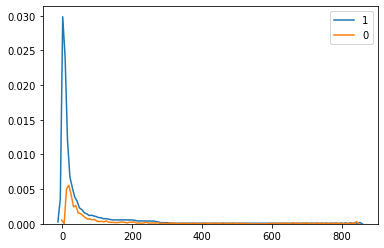

In [63]:
target_0 = m_df.loc[(m_df['isFraud'] == 0)]
target_1 = m_df.loc[(m_df['isFraud'] == 1)]

sns.distplot(target_1[['countPastFraud']], label=1, hist=False, rug=False)
sns.distplot(target_0[['countPastFraud']], label=0, hist=False, rug=False);

print("Max countPastFraud  is=", m_df['countPastFraud'].max())
print("Min countPastFraud is=",m_df['countPastFraud'].min())

## Feature Engineering and Exploration: Categorical/Object columns
In this section, we will quickly visualize all the Categorical/object columns once again, and see if there is any opportunity to re-code them. 

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [64]:
print(m_df.describe(include = [np.object]).transpose())

                       count unique            top    freq
merchantName          791403   2490           Uber   25613
acqCountry            791403      5             US  779686
merchantCountryCode   791403      5             US  783488
posEntryMode          791403      6             05  317177
posConditionCode      791403      4             01  633008
merchantCategoryCode  791403     19  online_retail  202849
transactionType       791403      4       PURCHASE  749855


So, the above table shows that all the categorical columns except merchant name can easily be visualized by bar chart. We will have to figure out how to best understand the merchant name. Further, we will need little bit more consideration on using merchant name directly in the model , since merchant name list may not be exhaustive and the model would not be able to score if a new merchant name is encountered. We 

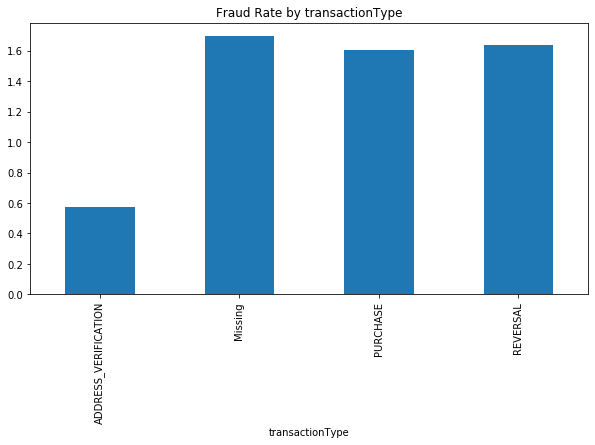

In [65]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
temp_df = m_df.groupby(['transactionType'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by transactionType");

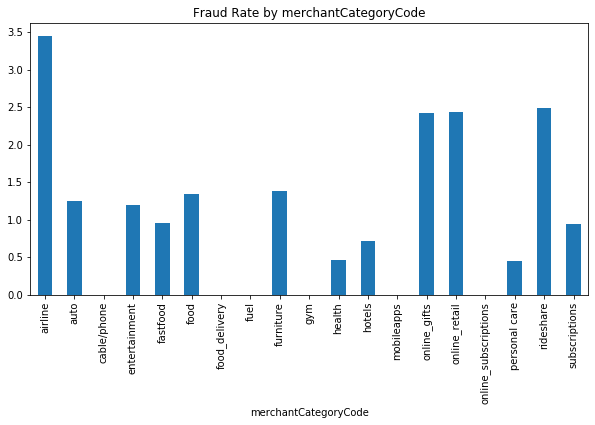

In [66]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
temp_df = m_df.groupby(['merchantCategoryCode'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by merchantCategoryCode");

In [67]:
import matplotlib.pyplot as plt
temp_df = m_df.groupby(['merchantCategoryCode'])['isFraud'].agg(['count','sum','mean'])
print(temp_df)

                       count   sum   mean
merchantCategoryCode                     
airline                15475   534  0.035
auto                   21777   273  0.013
cable/phone             1382     0  0.000
entertainment          80350   961  0.012
fastfood              112768  1074  0.010
food                   75490  1014  0.013
food_delivery           6000     0  0.000
fuel                   23910     0  0.000
furniture               7432   103  0.014
gym                     2209     0  0.000
health                 19092    90  0.005
hotels                 34664   250  0.007
mobileapps             15053     0  0.000
online_gifts           68758  1669  0.024
online_retail         202849  4938  0.024
online_subscriptions   11067     0  0.000
personal care          19090    86  0.005
rideshare              51136  1272  0.025
subscriptions          22901   216  0.009


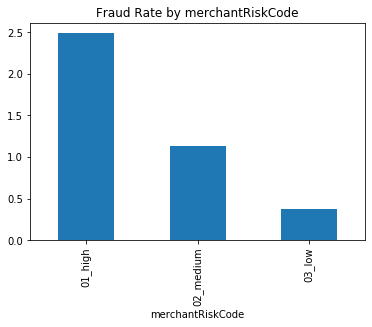

In [68]:
def Mcode(x):
    if x in ['airline','online_gifts','online_retail','rideshare']:
        return '01_high'
    elif x in ['auto','entertainment','fastfood','rideshare','food','subscriptions']:
        return '02_medium'
    else:
        return '03_low'

m_df['merchantRiskCode']=m_df['merchantCategoryCode'].apply(Mcode)
temp_df = m_df.groupby(['merchantRiskCode'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by merchantRiskCode");

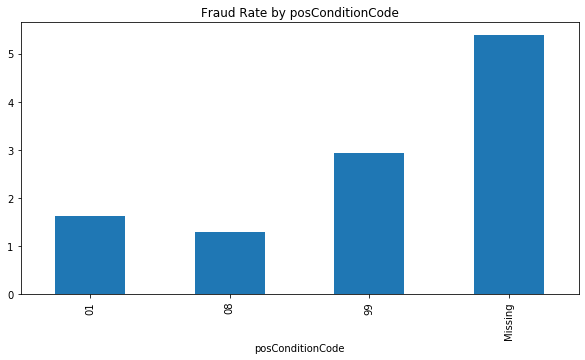

In [69]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
temp_df = m_df.groupby(['posConditionCode'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by posConditionCode");

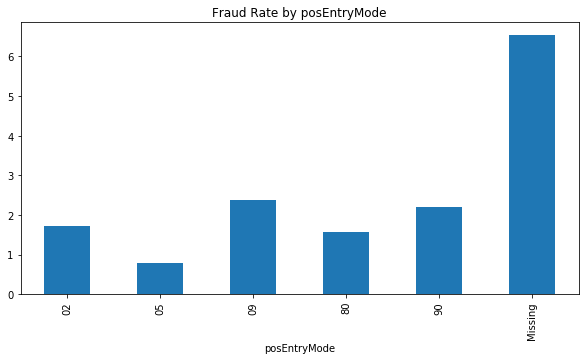

In [70]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
temp_df = m_df.groupby(['posEntryMode'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by posEntryMode");

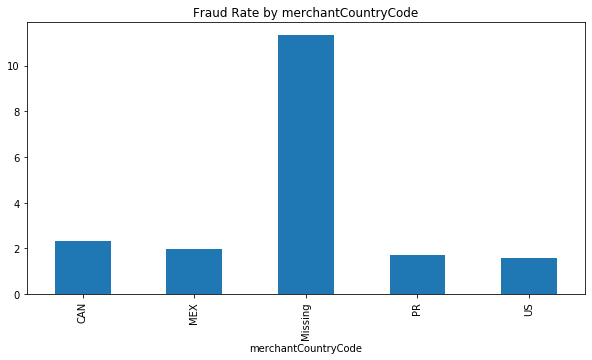

In [71]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
temp_df = m_df.groupby(['merchantCountryCode'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by merchantCountryCode");

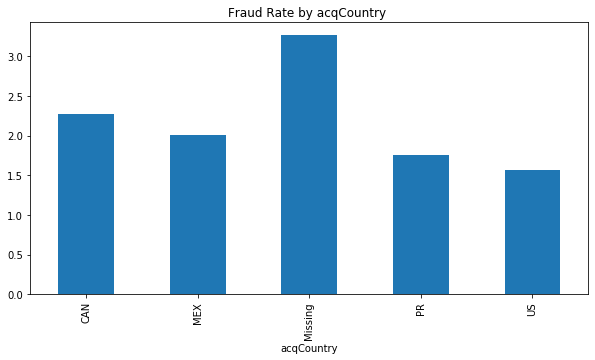

In [72]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
temp_df = m_df.groupby(['acqCountry'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by acqCountry ");

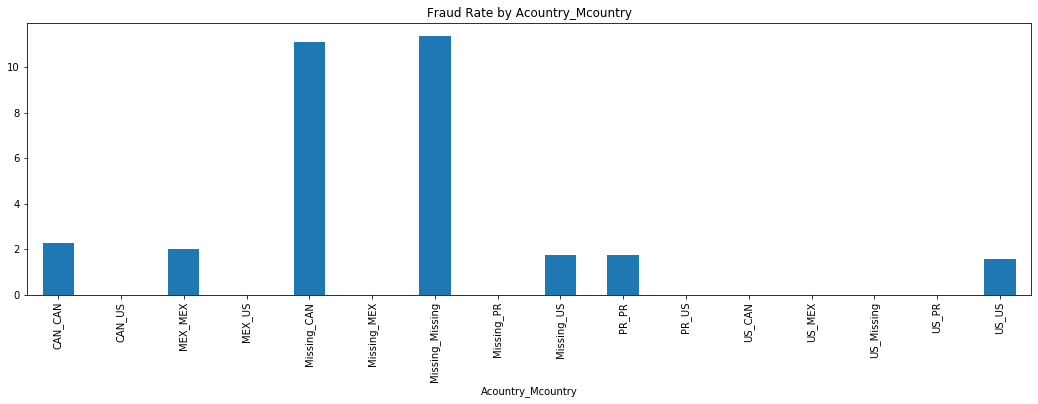

In [73]:
m_df["Acountry_Mcountry"] = m_df["acqCountry"] + "_"+ m_df["merchantCountryCode"]
f, ax = plt.subplots(figsize=(18,5))
temp_df = m_df.groupby(['Acountry_Mcountry'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by Acountry_Mcountry");

In [74]:
temp_df = m_df.groupby(['Acountry_Mcountry'])['isFraud'].agg(['count','sum', 'mean'])
print(temp_df)

                    count    sum   mean
Acountry_Mcountry                      
CAN_CAN              2413     55  0.023
CAN_US                 11      0  0.000
MEX_MEX              3172     64  0.020
MEX_US                 21      0  0.000
Missing_CAN             9      1  0.111
Missing_MEX            16      0  0.000
Missing_Missing       721     82  0.114
Missing_PR             12      0  0.000
Missing_US           3804     66  0.017
PR_PR                1536     27  0.018
PR_US                   2      0  0.000
US_CAN                  4      0  0.000
US_MEX                 18      0  0.000
US_Missing              3      0  0.000
US_PR                  11      0  0.000
US_US              779650  12185  0.016


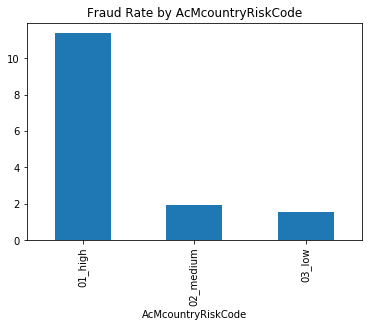

In [75]:
def AMcode(x):
    if x in ['Missing_Missing']:
        return '01_high'
    elif x in ['CAN_CAN','MEX_MEX','Missing_CAN','Missing_US','PR_PR']:
        return '02_medium'
    else:
        return '03_low'

m_df['AcMcountryRiskCode']=m_df['Acountry_Mcountry'].apply(AMcode)
m_df['AcMcountryRiskCode'].unique()
temp_df = m_df.groupby(['AcMcountryRiskCode'])['isFraud'].mean()*100
temp_df.plot.bar(title="Fraud Rate by AcMcountryRiskCode");

How to deal with Merhcant name? There are 2490 unique merchant name.

In [76]:
temp_df=m_df.groupby('merchantName')['isFraud'].agg(['count','sum','mean'])
temp_df=temp_df.sort_values('mean',ascending=False)
temp_df.describe()
temp_df.head(10)

,count,sum,mean
merchantName,,,
In-N-Out #949129,89,10,0.112
American Airlines,3139,295,0.094
In-N-Out #863086,96,9,0.094
In-N-Out #463194,96,8,0.083
In-N-Out #422833,110,9,0.082
In-N-Out #567597,89,7,0.079
Walgreens #475572,28,2,0.071
Fresh Flowers,8712,616,0.071
In-N-Out #17755,102,7,0.069


**Observations**
1. Honestly, I am pleasantly surprised to see the outcome! There are sparse count in several categories but they can be rebinned.
2. The '#' is delimiter across many categories (looks like order number), so I can simply remove the text beyond delimiter and it will simply the this column quite a bit.let me quickly do that and see the count of categories again

In [77]:
M_name=m_df['merchantName'].str.split("#", 1)
m_df['M_name_clean']=[x[0].strip() for x in M_name]

In [78]:
m_df['M_name_clean'].tail(10)

791393    Apple iTunes
791394       Texas Gas
791395       Texas Gas
791396         abc.com
791397         abc.com
791398    EZ Putt Putt
791399             AMC
791400     Hyatt House
791401     netflix.com
791402      target.com
Name: M_name_clean, dtype: object

In [79]:
m_df['M_name_clean'].head(10)

0     Washington Post
1       Regal Cinemas
2                 AMC
3                 AMC
4                 AMC
5                 AMC
6    Washington Times
7         Dallas Post
8       Regal Cinemas
9                 AMC
Name: M_name_clean, dtype: object

In [80]:
temp_df=m_df.groupby('M_name_clean')['isFraud'].agg(['count','sum','mean'])
temp_df=temp_df.sort_values('mean',ascending=False)
temp_df.describe()
temp_df.head(10)

,count,sum,mean
M_name_clean,,,
American Airlines,3139,295,0.094
Fresh Flowers,8712,616,0.071
ethanallen.com,490,24,0.049
Convenient Auto Services,1058,45,0.043
Rove Concepts,472,20,0.042
In-N-Out,6130,256,0.042
Dinosaur Restaurant,836,34,0.041
ebay.com,16905,639,0.038
Best Pub,823,28,0.034


**Observations**
- The highest fraud rate is found in american_airlines category, 9.4% which is about 6 times the avg fraud rate of population (1.5%) 
- All the top 10 bins have at least twice the fraud rate than the population fraud rate
- Given ample time, I would love to rebin them (may be, fit a decision tree to get to optimal binning) but for now, I will put them as in the model.
- One downside with using merchant name is the list of merchant being exclusive to this data. Any new merchant name will not be scored if I use merchant name column in the model. For now, I am going to keep it in the model data.  

## Create Train and Test Samples

In this section, we would like to create train and test samples based on the data that we have prepared so far. There are some considerations to make before we build out our train and test sample. 

- **Loop Variables**: We have created several loop variables that look at customer's past behavior and compare with current transaction. The goal is to see if the current transaction varies significantly from past and if that could help identify a fraud. However, since transaction data starts from 1st Jan 2016, the loop variables in initial few months can not  fully capture the true past behavior and hence, deviation from past. Therefore, it can potentially mislead the learning of the model. So, here are some ways to handle it:

1. Build a model with all the variables including loop variables but sample the model data to keep only those customer (and upto a transactiondate) who have made at least, let's say 30 transactions. This approach would essentially shift the start date to a point where we assume that we are able to capture customer's matured/satured transaction behavior. In this case , the start date can be different for each customer since different customer can reach 30 transactions at different point of time.  The downside of this model would be its inability to score relatively new accounts since model data will be based on customers with at least 30 transactions.  
2. Build a model using a data that excludes loop variables. Essentially, no model variables will be sequential in nature. This type of model can be built on entire population but can be applied to customers with few transactions or the ones who have recently opened their account.  

- **Imbalanced data**: The fraud rate in the current sample is about 1.5% which indicates imbalanced data. Typically, it is hard to build a good model in imbalance data unless there are some features that have extremely good classification power. There are some techniques that are deployed to handle imbalance:
1. Undersampling:  This will remove some non-frauds to increase the fraud rate
2.  Oversampling: This will synthetically repeat some frauds in the model data to increase fraud rate
3.  SMOTE and ADASYN: Synthetic Minority Oversampling Technique will synthetically add additional observations that looks like fraud using K-means clustering. ADASYN improves SMOTE by adding a little random component to the synthetically created to make it less collinear with sample from where it was created. This would also increase fraud rate.

As such, this adjustment to fraud rate in modelling sample does not impact the risk ranking/ordering but it does impact posterior probabilities which must be adjusted to reflect the 'true' prior distribution. If utlimate goal is to see expected dollar loss prevention through fraud model as: (Probability of fraud) * (transaction amount) then, the intepretation can be misleading if posterior probabilities are not adjusted with 'true' prior distribution.  

- Logistic regression model has some statistical assumptions built in and sometimes, the MLE may not converge due to high collinearity. Multicollinearity can be handled through regularization (Lasso and Ridge) but it is still helps to perform a variable selection through correlation chart or variable clustering to ensure that model variables can be interpretted correctly and their signs are not counter intuitive. So, in first pass, I might just build logistic regression model with full set of variables, but if time permits, I would build out logistic regression model separtely and perform all the necessary steps. 

Based on above discussion, my approach is to build train and test sample once with imbalanced data and then, after ADASYN is applied.Let's see how it goes.

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [81]:
m_df.dtypes 

accountNumber                              int64
customerId                                 int64
creditLimit                                int64
availableMoney                           float64
transactionDateTime               datetime64[ns]
transactionAmount                        float64
merchantName                              object
acqCountry                                object
merchantCountryCode                       object
posEntryMode                              object
posConditionCode                          object
merchantCategoryCode                      object
currentExpDate                             int64
accountOpenDate                   datetime64[ns]
dateOfLastAddressChange           datetime64[ns]
cardCVV                                    int64
enteredCVV                                 int64
cardLast4Digits                            int64
transactionType                           object
currentBalance                           float64
cardPresent         

# Iteration 1: Feature selection  (first trial)
1. Drop all the date columns since we have already created the derived features based of them.
2. Drop cardCVV, enteredCVV since we have derived column while card last 4 digit may not have much value or sense in it
3. Drop current balance, credit limit, and available balance: Utilization will be kept that is function of all 3
4. Merchant name is being dropped while cleaned up version of merchant name is being kept. Mechant category code is also being dropped. Merchant country code, acquiring country code and their risk code is being dropped while their composite variable is bring kept 
5. Keeping days since last transactions only while dropping all others since all of them are derived off them
6. Removing transaction velocity, momentum and ratio for 1 day and 7 days and only keeping the one for 3 days 
7. Removing avgTransactionAmtMC since it only captures avgs by merchant category 

In [82]:
m1_df = m_df.drop([
                    'accountOpenDate', 'dateOfLastAddressChange', 'currentExpDate' ,  
                   'cardLast4Digits','cardCVV','enteredCVV',                          
                   'currentBalance','creditLimit','availableMoney','availableMoneyCreditLimitRatio',
                   'merchantName','merchantCategoryCode','merchantCountryCode', 'acqCountry','AcMcountryRiskCode',
                   'SecondsSinceLastTransaction','MinutesSinceLastTransaction','HoursSinceLastTransaction',
  'avgAvgTransactionAmt_L1D','countTransaction_L1D','avgTransactionAmt_L1D','ratioCountTransaction_L1D','ratioTransactionAmt_L1D','avgCountTransaction_L1D',
                    'avgAvgTransactionAmt_L7D','countTransaction_L7D','avgTransactionAmt_L7D','ratioCountTransaction_L7D','ratioTransactionAmt_L7D','avgCountTransaction_L7D'
                    ,
                    'avgTransactionAmtMC',
                    'accountNumber','customerId','transactionDateTime'  
                         #'hour_of_transaction','weekday_of_transaction',
                       ], axis = 1)

In [83]:
m1_df.dtypes

transactionAmount                 float64
posEntryMode                       object
posConditionCode                   object
transactionType                    object
cardPresent                         int32
expirationDateKeyInMatch            int32
isFraud                             int32
DaysSinceLastTransaction          float64
hour_of_transaction                 int64
weekday_of_transaction              int64
AgeAccountDays                      int64
Months_to_Card_Expiry               int64
daysSinceAddressChanged             int64
cvv_match                           int32
utilization                       float64
ratioAmtMC_Customer_Total         float64
avgTransactionAmountCustomerMC    float64
ratioAmtMC_Customer               float64
countTransaction_L3D              float64
avgTransactionAmt_L3D             float64
avgCountTransaction_L3D           float64
avgAvgTransactionAmt_L3D          float64
ratioCountTransaction_L3D         float64
ratioTransactionAmt_L3D           

In [318]:
# Converting all categorical variables with k categories as dummy variables (k-1)
# hour of transaction and weekday of transaction is not categorical but must be converted to dummy since their true value should not 
#contribute to prediction

In [84]:
for column in [ 'merchantRiskCode', 'transactionType','posEntryMode','merchantRiskCode','Acountry_Mcountry','M_name_clean'
                ,'hour_of_transaction','weekday_of_transaction']:
    dummies = pd.get_dummies(m1_df[column],prefix=column,drop_first=True)
    m1_df[dummies.columns] = dummies

print(" ") 
print("Columns in new data")
print(" ") 
print(m1_df.dtypes)

 
Columns in new data
 
transactionAmount                             float64
posEntryMode                                   object
posConditionCode                               object
transactionType                                object
cardPresent                                     int32
expirationDateKeyInMatch                        int32
isFraud                                         int32
DaysSinceLastTransaction                      float64
hour_of_transaction                             int64
weekday_of_transaction                          int64
AgeAccountDays                                  int64
Months_to_Card_Expiry                           int64
daysSinceAddressChanged                         int64
cvv_match                                       int32
utilization                                   float64
ratioAmtMC_Customer_Total                     float64
avgTransactionAmountCustomerMC                float64
ratioAmtMC_Customer                           float64
coun

In [85]:
m2_df=m1_df.drop(['merchantRiskCode', 'transactionType','posEntryMode','merchantRiskCode','Acountry_Mcountry','M_name_clean'
                ,'hour_of_transaction','weekday_of_transaction','posConditionCode'],axis=1)

In [321]:
## Check again all the numeric columns if they have too high value (infinity) or Nan

In [87]:
m2_df.describe(include = [np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
transactionAmount,791403.0,1.372e+02,147.816,0.000,33.740,88.150,191.530,2.012e+03
cardPresent,791403.0,4.477e-01,0.497,0.000,0.000,0.000,1.000,1.000e+00
expirationDateKeyInMatch,791403.0,1.318e-03,0.036,0.000,0.000,0.000,0.000,1.000e+00
isFraud,791403.0,1.577e-02,0.125,0.000,0.000,0.000,0.000,1.000e+00
DaysSinceLastTransaction,786403.0,2.108e+00,6.182,0.000,0.074,0.382,1.622,3.282e+02
AgeAccountDays,791403.0,8.836e+02,696.662,1.000,431.000,680.000,1106.000,9.990e+03
Months_to_Card_Expiry,791403.0,1.232e+02,47.502,36.000,82.000,123.000,164.000,2.110e+02
daysSinceAddressChanged,791403.0,4.457e+02,662.453,0.000,28.000,156.000,608.000,9.990e+03
cvv_match,791403.0,9.909e-01,0.095,0.000,1.000,1.000,1.000,1.000e+00
utilization,791403.0,4.614e-01,0.309,0.000,0.174,0.474,0.732,4.722e+00


- Dropping two additional columns: ratioAmtMC_Customer and avgTransactionAmountCustomerMC due to them being high due to division by 0 
- Keeping only those customers with at least 30 transactions for modeling for loop features to make sense. At the moment, 30 is just a starting number but will need to be refined based on further analysis

In [88]:
m2_df=m2_df.drop(['ratioAmtMC_Customer','avgTransactionAmountCustomerMC'],axis=1)
m3_df=m2_df[m2_df['cumsumCountTransaction']>=30]
print("Count of total observations when (cumsumCountTransaction>=30)",m3_df['isFraud'].count())
print("Fraud Count of total observations when (cumsumCountTransaction>=30)",m3_df['isFraud'].sum())
print("Fraud Rate when (cumsumCountTransaction>=30)",m3_df['isFraud'].mean()*100)

Count of total observations when (cumsumCountTransaction>=30) 669222
Fraud Count of total observations when (cumsumCountTransaction>=30) 10834
Fraud Rate when (cumsumCountTransaction>=30) 1.6188947763223562


In [89]:
m3_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
transactionAmount,669222.0,1.397e+02,148.481,0.000,35.230,91.480,194.940,1905.300
cardPresent,669222.0,4.461e-01,0.497,0.000,0.000,0.000,1.000,1.000
expirationDateKeyInMatch,669222.0,1.303e-03,0.036,0.000,0.000,0.000,0.000,1.000
isFraud,669222.0,1.619e-02,0.126,0.000,0.000,0.000,0.000,1.000
DaysSinceLastTransaction,669222.0,1.060e+00,2.186,0.000,0.056,0.270,1.038,76.019
AgeAccountDays,669222.0,8.931e+02,687.034,13.000,451.000,690.000,1103.000,9990.000
Months_to_Card_Expiry,669222.0,1.228e+02,47.473,36.000,82.000,123.000,164.000,211.000
daysSinceAddressChanged,669222.0,3.815e+02,624.483,0.000,21.000,102.000,486.000,9990.000
cvv_match,669222.0,9.909e-01,0.095,0.000,1.000,1.000,1.000,1.000
utilization,669222.0,5.111e-01,0.293,0.000,0.267,0.542,0.763,4.722


- Split the data into training and validation
- Apply standardization

In [90]:
# Split into X and Y
y=m3_df['isFraud']
X=m3_df.drop(['isFraud'],axis=1)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


- Adjustment made for Imbalanced Data
- Create additional train and test sample that are oversampled using adasyn technique

In [91]:
!pip install imblearn
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\singas\anaconda3\lib\site-packages (0.23.2)


In [92]:
from imblearn.over_sampling import ADASYN 
from collections import Counter
# apply the ADASYN over-sampling

ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 460754, 1: 7701})
Resampled dataset shape Counter({1: 462051, 0: 460754})


In [93]:
y_res.mean()

0.5007027486847168

## Build models and produce model performance

In this section, we will try different set of models on true sample and then, later on oversampled data. I am planinng to build and assess folling models:
- Light GBM
- XG Boost
- Random Forest
- Neural Network
- Cat Boost
- Decision Tree
- Logistic Regression

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

## Model 1: Light GBM (No oversampling)

In [329]:
import pip
pip.main(['install', 'lightgbm'])
import lightgbm as lgb

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [330]:
 train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

lgb_model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)



[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's auc: 0.756388
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.77987
[3]	valid_0's auc: 0.789213
[4]	valid_0's auc: 0.794127
[5]	valid_0's auc: 0.797477
[6]	valid_0's auc: 0.800315
[7]	valid_0's auc: 0.80282
[8]	valid_0's

<Figure size 1440x1440 with 0 Axes>

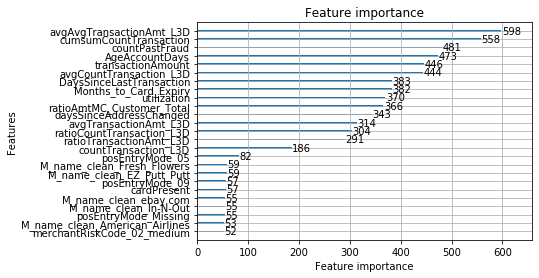

In [331]:
plt.figure(figsize=(20,20))
lgb.plot_importance(lgb_model, max_num_features=25, importance_type='split')

# Model 1: Performance of LightGBM (Without Oversampling)

Overall accuracy of Light GBM model: 0.9765150647267729


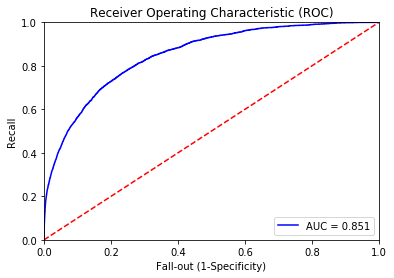

AUC score: 0.8508324997649096
recall: [0.00000000e+00 3.19182892e-04 2.55346313e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


<Figure size 432x288 with 0 Axes>

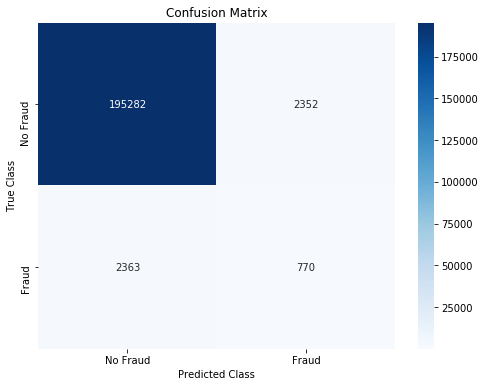

In [332]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
y_test_pred = lgb_model.predict(X_test)
predictions_lgbm_01 = np.where(y_test_pred > 0.85, 1, 0)
#Print accuracy
acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall:', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 2: Decision Tree (No oversampling)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [333]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_test_pred = dtree.predict(X_test)
cm2 = metrics.confusion_matrix(y_test, y_test_pred)
print(cm2)

[[194675   2959]
 [  2440    693]]


# Model 2: Performance of Decision Tree (no oversampling)

Overall accuracy of Decision Tree: 0.9731081303202219


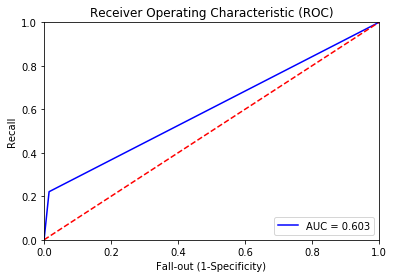

AUC score: 0.6031108119167854
recall: [0.         0.22119374 1.        ]


<Figure size 432x288 with 0 Axes>

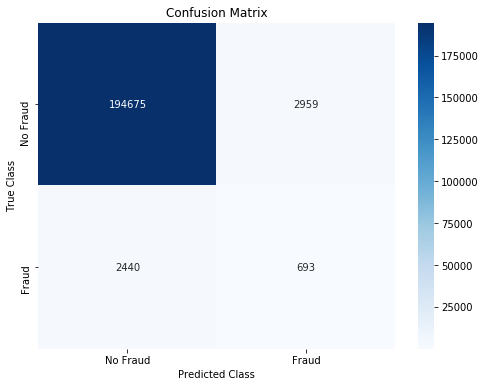

In [334]:
y_test_pred = dtree.predict(X_test)
#predictions_lgbm_01 = np.where(y_test_pred > 0.80, 1, 0)
#Print accuracy
#acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
acc_lgbm = accuracy_score(y_test,y_test_pred)
print('Overall accuracy of Decision Tree:', acc_lgbm)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall:', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, y_test_pred)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 3: XGBoost (No oversampling)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [335]:
!pip install xgboost
import xgboost as xgb

In [336]:
rates=[0.05]
trees=[250]
depths=[3]
gammas=[0]
lambdas=[0]
subsamples=[0.8]
colsamples=[0.8]

params={"learning_rate":rates, "n_estimators":trees, "max_depth":depths, "gamma":gammas, \
                                    "lambda": lambdas, "subsample":subsamples, "colsample_bytree":colsamples, "colsample_bylevel":1, \
                                    "scale_pos_weight": 1, "objective": 'binary:logistic', "silent": 0, "nthread": -1, \
                                    "tree_method":'gpu_hist', \
                                    "gpu_id":0 \
                                    }
#xgb_model=xgb.XGBClassifier(params)
# Running xgboost with default setting
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [337]:
y_test_pred = xgb_model.predict(X_test)
cm2 = metrics.confusion_matrix(y_test, y_test_pred)
print(cm2)

[[197603     31]
 [  2717    416]]


# Model 3: Performance of XGboost (No oversampling)

Overall accuracy of XGBoost: 0.9617516822983857


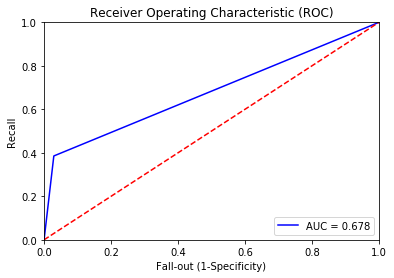

AUC score: 0.678229254829607
recall: [0.         0.38557293 1.        ]


<Figure size 432x288 with 0 Axes>

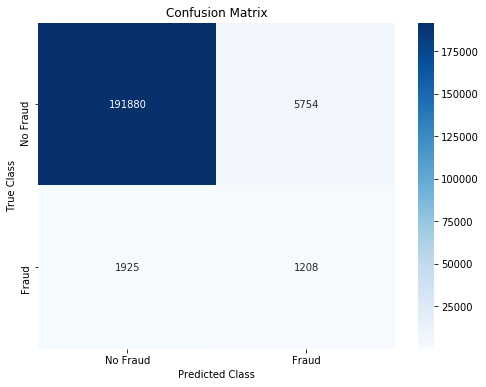

In [338]:
#y_test_pred = xgb_model.predict(X_test)
p_hat=(xgb_model.predict_proba(X_test))[:,1]
#p_hat=xgb_model.predict_proba()
predictions_XGBoost_01 = np.where(p_hat > 0.07, 1, 0)
#Print accuracy
#acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)

acc_xgb = accuracy_score(y_test,predictions_XGBoost_01)
print('Overall accuracy of XGBoost:', acc_xgb)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_XGBoost_01)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall:', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_XGBoost_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 4: Logistic Regression (No Oversampling)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [339]:
logistic = sm.Logit(y_train, X_train)
logistic = logistic.fit_regularized(method='l1', maxiter='defined_by_method', full_output=1, disp=1)
print(logistic.summary())

C:\Users\singas\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\singas\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Iteration limit exceeded    (Exit mode 9)
            Current function value: 0.07327441723477242
            Iterations: 1001
            Function evaluations: 1035
            Gradient evaluations: 1001


C:\Users\singas\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\singas\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\singas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\singas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\singas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:               468455
Model:                          Logit   Df Residuals:                   468179
Method:                           MLE   Df Model:                          275
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:                  0.1260
Time:                        22:44:51   Log-Likelihood:                -34326.
converged:                      False   LL-Null:                       -39274.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
transactionAmount                             -0.0122      0.004     -2.974      0.003      -0.020      -0.004
cardPresent                        

# Model 4: Performance of Logistic Regression (No Oversampling)

Overall accuracy of logistic: 0.9181688225654615


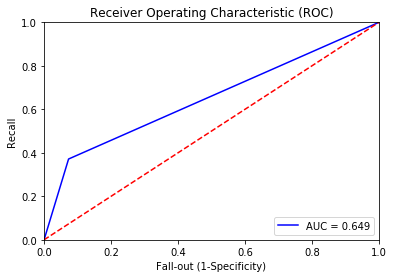

AUC score: 0.6491816688068429
recall: [0.         0.37152889 1.        ]


<Figure size 432x288 with 0 Axes>

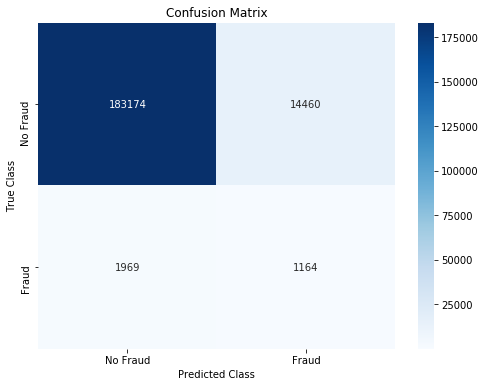

In [340]:
y_test_pred = logistic.predict(X_test)
predictions_logistic = np.where(y_test_pred > 0.04, 1, 0)
#Print accuracy
#acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
acc_logistic = accuracy_score(y_test,predictions_logistic)
print('Overall accuracy of logistic:', acc_logistic)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_logistic)
roc_auc = auc(false_positive_rate, recall)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall:', recall)

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_logistic)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

# Observation:
Logistic Regression with L1 regularization (Lasso) can drop the colliear variables, but produces biased estimates. However, since we had so many columns in the model data, it was important to apply regularization. If I had more time, I would have preferred to perform a variable clutering and correlation plot to manually select the variables for the model, and would run stepwise selection to let model select the right columns.

So far, the variables that look significant (p-value<0.05)  are:
1. avgAvgTransactionAmt_L3D (transaction momentum) (+)
2. Acountry_Mcountry_Missing_Missing (+)
3. Months_to_Card_Expiry (+)
4. ratioAmtMC_Customer_Total (Ratio of customer's avg transaction in a MC vs overall avg transaction amount in the same MC ) (+) 
5. utilization (-)
6. transactionType=(Missing, reversal, purchase) (+)
7. weekday_of_transaction_5 
8. countPastFraud (+)
9. merchantRiskCode_02_medium (-)
10. cumsumCountTransaction (rolled up total count of transaction till date) (+)
11. posEntryMode_*
12. M_name_clean_*
13. hour_of_transaction_3 (+)
14. weekday_of_transaction_5 (+)
15. transactionAmount (-)

The signs of all the variables are not reliable as there is a possibility of certain correlated variables adjusting their impact to prediction due to presence of other correlated variables. 

## Model 5: Random Forest (No Oversampling)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [341]:
# Run CV with 5 folds (Random Forest)
""" using the ravel simply to avoid warning in log """
#y_train_array=np.ravel(y_train_df)
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10],
    'min_samples_split': [5],
    'n_estimators': [500]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train,y_train)
#y_test_pred = rf_grid.predict(X_test)
#cm2 = metrics.confusion_matrix(y_test, y_test_pred)
#print(cm2)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.6min remaining: 24.9min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 16.6min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10], 'min_samples_split': [5],
                         'n_estimators': [500]},
             scoring='roc_auc', verbose=10)

# Model 5: Performance of Random Forest (Without Oversampling)

Overall accuracy of RadomForest: 0.9607256172578162


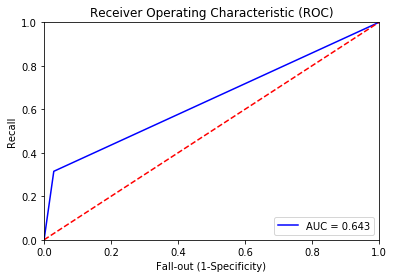

AUC score: 0.6429974942219505
Recall: [0.         0.31503351 1.        ]


<Figure size 432x288 with 0 Axes>

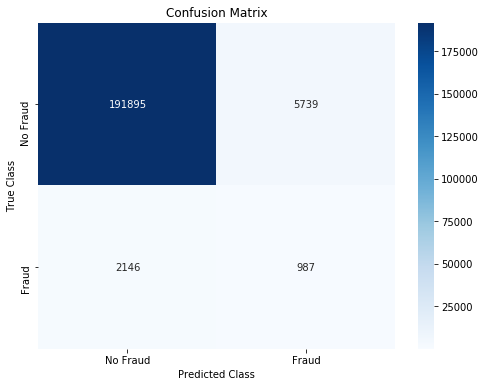

In [342]:
#y_test_pred = rf_grid.predict(X_test)
p_hat=(rf_grid.predict_proba(X_test))[:,1]

predictions_rf_grid_01 = np.where(p_hat > 0.04, 1, 0)
acc_rf = accuracy_score(y_test,predictions_rf_grid_01)
print('Overall accuracy of RadomForest:', acc_rf)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_rf_grid_01)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('Recall:', recall)


#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_rf_grid_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 6: Neural Network (No Oversampling)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [94]:
X_train.shape

(468455, 276)

In [ ]:
import pip
pip.main(['install', 'keras'])
pip.main(['install', 'tensorflow'])

In [96]:
# Sample Multilayer Perceptron Neural Network in Keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# 1. define the network
model = Sequential()
model.add(Dense(5, input_dim=276, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 2. compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 3. fit the network
#history = model.fit(train_data, epochs=100, batch_size=10,validation_data=valid_data)
neuralNetwork = model.fit(X_train, y_train,epochs=30, batch_size=10)

Epoch 1/30
46846/46846 [==============================] - 47s 1ms/step - loss: 0.1046 - accuracy: 0.9828
Epoch 2/30
46846/46846 [==============================] - 52s 1ms/step - loss: 0.0808 - accuracy: 0.9836
Epoch 3/30
46846/46846 [==============================] - 52s 1ms/step - loss: 0.0792 - accuracy: 0.9836
Epoch 4/30
46846/46846 [==============================] - 49s 1ms/step - loss: 0.0787 - accuracy: 0.9835
Epoch 5/30
46846/46846 [==============================] - 50s 1ms/step - loss: 0.0781 - accuracy: 0.9836 0s - loss: 0.0782 - accu
Epoch 6/30
46846/46846 [==============================] - 50s 1ms/step - loss: 0.0778 - accuracy: 0.9836
Epoch 7/30
46846/46846 [==============================] - 50s 1ms/step - loss: 0.0775 - accuracy: 0.9836
Epoch 8/30
46846/46846 [==============================] - 50s 1ms/step - loss: 0.0773 - accuracy: 0.9836
Epoch 9/30
46846/46846 [==============================] - 50s 1ms/step - loss: 0.0774 - accuracy: 0.9836
Epoch 10/30
46846/46846 [=====

# Model 6: Performance of Neural Network (without Oversampling)

Overall accuracy of Neural Network: 0.7833060214079007


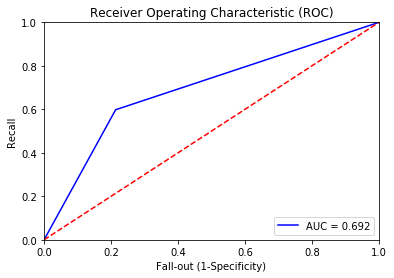

AUC score: 0.692194986511691
Recall: [0.         0.59814874 1.        ]


<Figure size 432x288 with 0 Axes>

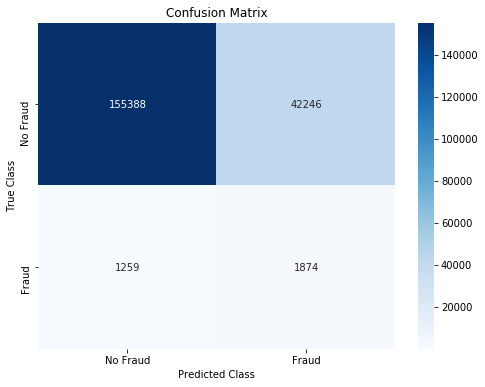

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
y_test_pred = model.predict(X_test)
predictions_nn_01 = np.where(y_test_pred > 0.040, 1, 0)
acc_nn = accuracy_score(y_test,predictions_nn_01)
print('Overall accuracy of Neural Network:', acc_nn)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_nn_01)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('Recall:', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_nn_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 7: CatBoost (without Oversampling)

In [ ]:
pip.main(['install', 'catboost'])
import catboost

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [100]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# evaluate the model
#model = CatBoostClassifier(verbose=0, n_estimators=500)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X_train, y_train, scoring= 'precision', cv=cv, n_jobs=-1, error_score='raise')
#print('precision: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
cboost = CatBoostClassifier(verbose=0, n_estimators=500)
cboost.fit(X_train, y_train)
# make a single prediction
#y_test_Dtree_pred_df = model.predict(x_test_Dtree_df)

# Model 7: Performance of Catboost (without Oversampling) 

Overall accuracy of Catboost model: 0.9258692912679872


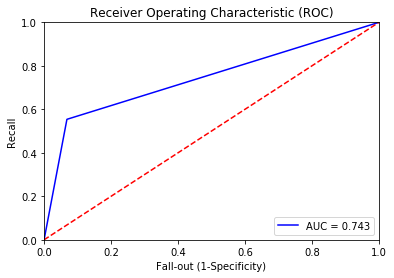

AUC score: 0.7429321267659935
recall [0.        0.5541015 1.       ]


<Figure size 432x288 with 0 Axes>

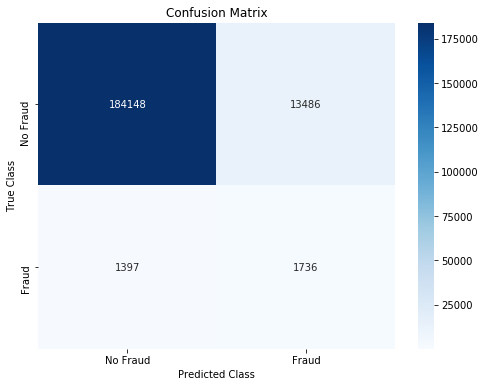

In [101]:
#predictions_catboost_01 = np.where(y_test_Dtree_pred_df==1, 1, 0)
p_hat=(cboost.predict_proba(X_test))[:,1]
predictions_cboost_01 = np.where(p_hat > 0.04, 1, 0)
acc_catboost = accuracy_score(y_test,predictions_cboost_01)
print('Overall accuracy of Catboost model:', acc_catboost)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_cboost_01)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_cboost_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

# Models with oversampled model data

## Model 1: Light GBM (oversampled)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [103]:
#use X_res, y_res for training
import lightgbm as lgb
train_data = lgb.Dataset(X_res, label=y_res)
test_data = lgb.Dataset(X_test, label=y_test)
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

lgb_model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.182852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's auc: 0.673537
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.674043
[3]	valid_0's auc: 0.701965
[4]	valid_0's auc: 0.71763
[5]	valid_0's auc: 0.722431
[6]	valid_0's auc: 0.728809
[7]	valid_0's auc: 0.727502
[8]	valid_0's auc: 0.730539
[9]	valid_0's auc: 0.732906
[10]	valid_0's auc: 

# Model 1: Performance of Light GBM (Oversampled)

Overall accuracy of Light GBM model: 0.985864210751767


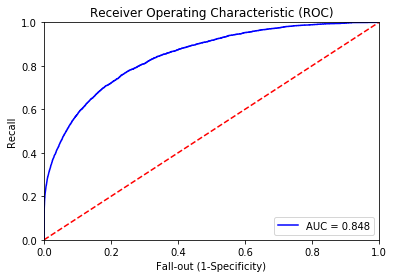

AUC score: 0.8482648729038416
recall: [0.00000000e+00 3.19182892e-04 1.27673157e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


<Figure size 432x288 with 0 Axes>

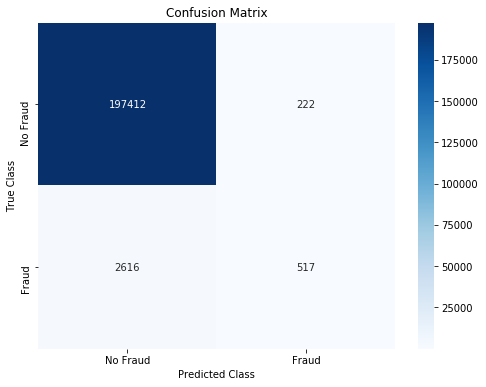

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
y_test_pred = lgb_model.predict(X_test)
predictions_lgbm_01 = np.where(y_test_pred > 0.70, 1, 0)
#Print accuracy
acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall:', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 2: MLP Neural Network (oversampled)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [ ]:
 pip.main(['install', 'keras'])
pip.main(['install', 'tensorflow'])

In [112]:
# Sample Multilayer Perceptron Neural Network in Keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy

train_data = tf.data.Dataset.from_tensor_slices((X_res, y_res))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# 1. define the network
model = Sequential()
model.add(Dense(5, input_dim=276, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 2. compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 3. fit the network
#history = model.fit(train_data, epochs=100, batch_size=10,validation_data=valid_data)
neuralNetwork = model.fit(X_res, y_res,epochs=18, batch_size=10)

Epoch 1/18
92281/92281 [==============================] - 126s 1ms/step - loss: 0.6937 - accuracy: 0.4996
Epoch 2/18
92281/92281 [==============================] - 127s 1ms/step - loss: 0.6933 - accuracy: 0.5001
Epoch 3/18
92281/92281 [==============================] - 121s 1ms/step - loss: 0.6933 - accuracy: 0.4996
Epoch 4/18
92281/92281 [==============================] - 121s 1ms/step - loss: 0.6933 - accuracy: 0.5005
Epoch 5/18
92281/92281 [==============================] - 120s 1ms/step - loss: 0.6933 - accuracy: 0.4999
Epoch 6/18
92281/92281 [==============================] - 135s 1ms/step - loss: 0.6933 - accuracy: 0.5005
Epoch 7/18
92281/92281 [==============================] - 116s 1ms/step - loss: 0.6933 - accuracy: 0.4993
Epoch 8/18
92281/92281 [==============================] - 156s 2ms/step - loss: 0.6933 - accuracy: 0.5003
Epoch 9/18
92281/92281 [==============================] - 127s 1ms/step - loss: 0.6933 - accuracy: 0.5010
Epoch 10/18
92281/92281 [=====================

# Model 2: Performance of MLP Neural Network (oversampled)

Overall accuracy of Neural Network: 0.9843948457664855


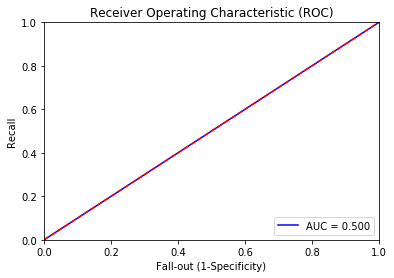

AUC score: 0.5
Recall: [0. 1.]


<Figure size 432x288 with 0 Axes>

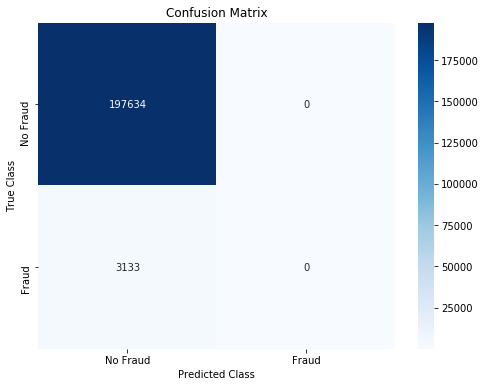

In [119]:
y_test_pred = model.predict(X_test)
predictions_nn_01 = np.where(y_test_pred > 0.54, 1, 0)
acc_nn = accuracy_score(y_test,predictions_nn_01)
print('Overall accuracy of Neural Network:', acc_nn)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_nn_01)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('Recall:', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_nn_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 3: XGBoost (Oversampled)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [105]:
import xgboost as xgb
#
#rates=[0.01, 0.05]
#n_estimators=[500]
#depths=[4]
#gammas=[0]
#lambdas=[0]
#subsamples=[1]
#colsamples=[0.8]

#params={"learning_rate":rates, "n_estimators":n_estimators, "max_depth":depths, "gamma":gammas, \
  #                                  "lambda": lambdas, "subsample":subsamples, "colsample_bytree":colsamples, "colsample_bylevel":1, \
   #                                 "scale_pos_weight": 1, "objective": 'binary:logistic'
    #                                }

#xgb_model=xgb.XGBClassifier(max_depth=12,
#                            depth=8,
#                        subsample=1,
#                        objective='binary:logistic',
#                        n_estimators=300,
#                        learning_rate = 0.01)

#Running xgboost with default setting
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Model 3: Model Performance of XGBoost (Oversampled)

Overall accuracy of XGBoost: 0.9548282337236698


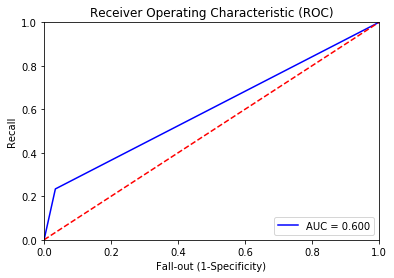

AUC score: 0.6001084329371976
recall: [0.         0.23396106 1.        ]


<Figure size 432x288 with 0 Axes>

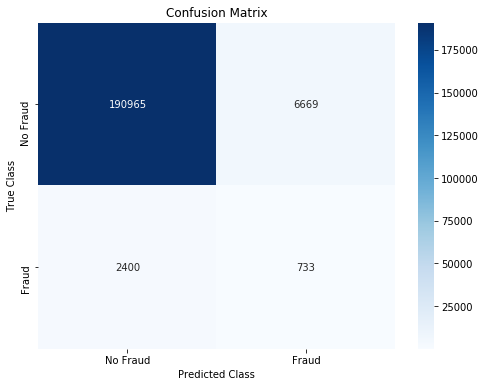

In [106]:
#y_test_pred = xgb_model.predict(X_test)
p_hat=(xgb_model.predict_proba(X_test))[:,1]
#p_hat=xgb_model.predict_proba()
predictions_XGBoost_01 = np.where(p_hat > 0.25, 1, 0)
#Print accuracy
#acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)

acc_xgb = accuracy_score(y_test,predictions_XGBoost_01)
print('Overall accuracy of XGBoost:', acc_xgb)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_XGBoost_01)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall:', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_XGBoost_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 4: Decision Tree (Oversampled)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [107]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_res, y_res)

y_test_pred = dtree.predict(X_test)

# Model 4: Performance of Decision Tree (Oversampled)

Overall accuracy of Decision Tree: 0.9606459228857332


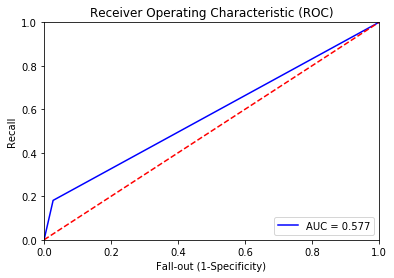

AUC score: 0.5771482398019772
recall: [0.         0.18129588 1.        ]


<Figure size 432x288 with 0 Axes>

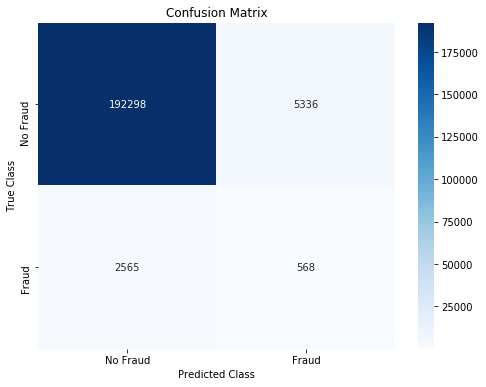

In [108]:
y_test_pred = dtree.predict(X_test)

acc_dtree = accuracy_score(y_test,y_test_pred)
print('Overall accuracy of Decision Tree:', acc_dtree)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall:', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, y_test_pred)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 5: Catboost (Oversampled)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [109]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# evaluate the model
#model = CatBoostClassifier(verbose=0, n_estimators=500)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X_train, y_train, scoring= 'precision', cv=cv, n_jobs=-1, error_score='raise')
#print('precision: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
cboost = CatBoostClassifier(verbose=0, n_estimators=500)
cboost.fit(X_res, y_res)
# make a single prediction
#y_test_Dtree_pred_df = model.predict(x_test_Dtree_df)

# Model 5: Performance of Catboost (Oversampled)

Overall accuracy of Catboost model: 0.8946440401061928


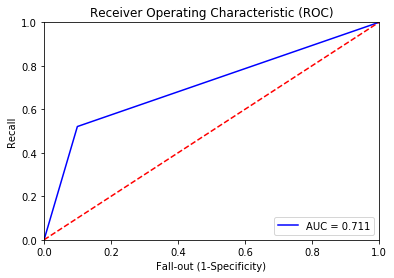

AUC score: 0.7107376037327844
recall [0.         0.52090648 1.        ]


<Figure size 432x288 with 0 Axes>

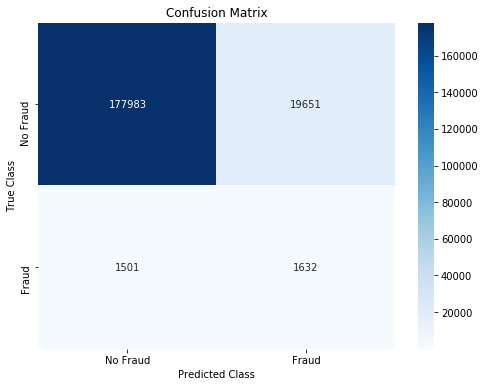

In [110]:
#predictions_catboost_01 = np.where(y_test_Dtree_pred_df==1, 1, 0)
p_hat=(cboost.predict_proba(X_test))[:,1]
predictions_cboost_01 = np.where(p_hat > 0.04, 1, 0)
acc_catboost = accuracy_score(y_test,predictions_cboost_01)
print('Overall accuracy of Catboost model:', acc_catboost)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_cboost_01)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('recall', recall)
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_cboost_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

## Model 6: Random Forest (Oversampled)

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

In [120]:
# Run CV with 5 folds (Random Forest)
""" using the ravel simply to avoid warning in log """
#y_train_array=np.ravel(y_train_df)
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10],
    'min_samples_split': [5],
    'n_estimators': [500]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_res,y_res)
#y_test_pred = rf_grid.predict(X_test)
#cm2 = metrics.confusion_matrix(y_test, y_test_pred)
#print(cm2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 61.7min remaining: 92.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 62.0min remaining: 41.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 62.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 62.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10], 'min_samples_split': [5],
                         'n_estimators': [500]},
             scoring='roc_auc', verbose=10)

Overall accuracy of RadomForest: 0.7886555061339762


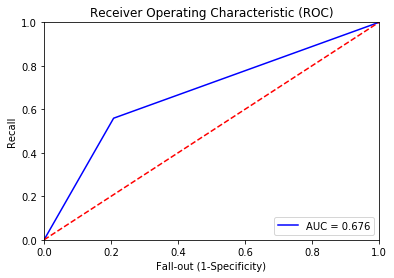

AUC score: 0.6757506252687777
Recall: [0.         0.55920843 1.        ]


<Figure size 432x288 with 0 Axes>

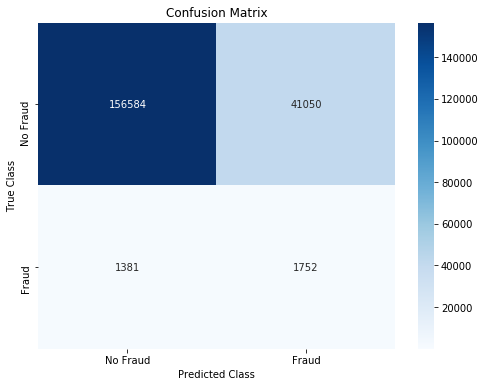

In [122]:
#y_test_pred = rf_grid.predict(X_test)
p_hat=(rf_grid.predict_proba(X_test))[:,1]

predictions_rf_grid_01 = np.where(p_hat > 0.42, 1, 0)
acc_rf = accuracy_score(y_test,predictions_rf_grid_01)
print('Overall accuracy of RadomForest:', acc_rf)
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_rf_grid_01)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('Recall:', recall)


#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_rf_grid_01)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

# Moving work to Google colab
The hyper parameter training, specially for grid search, is taking way too long in this notebook and often, freezes when running for long time. Due to that, if I need to finish a run, I am limited to using default inputs for all the advanced machine learning methods like XGBoost, LightGBM, Random Forest, Neural Network. I also had to drop the idea of running with k-cross validation with most of the models. Today is day 7 and I don't have much time left, so in view of that, I am moving the work of hyper parameter tuning and modeling to Google colab for better GPU. I am hoping to see some improvement with XGboost, but not sure if it can finish the run in time. If additional results are available from google colab notebook before my submission deadline, then those results will be added in the report provided along with this notebook.  

So, as the next step, I will copy the X_train, X_test, and y_train, y_test and then, move to google drive. All the further insights will be provided in the next notebook if the model run finished in time. 

In [123]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('Y_train.csv',index=False)
y_test.to_csv('Y_test.csv',index=False)

## Summary of Model results 
Overall, among all the models that were tested for both oversampled and full sampled model data, Light GBM performed the best in terms of area under the curve (0.85) in validation sample. The F1 score was still low (nearly 25%) with precision and recall both around 25%. However, since fraud rate was around 1.6% , the lift over random is over 16 times. Essentially, it implies that # frauds captured through the model would be 16 times more in top 1.5% model scored customer when compared with # frauds in 1.5% randomly selected sample. Among top features that were significant predictors in Light GBM were:
1. Avg Transaction momentum over last 3 days
2. Transaction velocity over last 3 days
3. Utilization
4. Count of past Frauds
5. Ratio of customer's expense in given MC with avg expense in the same MC by entire population
6. Transaction Amount
7. Certain Merchants (American Airlines, Fresh Flowers, ebay.com, In-n-Out)
8. Post Entry code=missing
9. Days since Address Changed

Most of these columns had shown good partitioning power during feature exploration step, so it makes sense to see them significant in the model as well. 

As concluding remarks, all the models require more finetuning to improve their performance. This exercise simply shows one iteration of modeling process. In the next section, I will cover additional discussion points.  

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

## Discussion Points on Future Improvement:
Throughout the modeling  process, several assumptions and modelling choices were made. However, since this assignment was to be completed in 7 days, not all assumptions and choices were fully tested. In fact, I could only perform one iteration of model run during this period. Further, I did not have access to more data or ability to contact business and data team to discuss some of the findings, as such, the models remain incomplete without their inputs.  Due to that, there exists scope of improvement in the modelling process. However, in real life project, I would do following:

**Additional Time**
- With additional time, I would perform few more iterations of model runs using different set of features since some features were dropped from the training since their similar features were available (Ex: transaction velocity over 3 days was kept while dropped for 1 day and 7 days).
- I would spend more time on tuning models by optimizing hyper parameter space through grid search. I would also run k-cross validation for training the models. 
- I would spend more time in building a good logistic regression model as my baseline model. Logistic regression model requires features to be carefully selected through variable clustering, and correlation chart. 
- I would build a model without using loop variables first and then, introduce loop variables to see incremental improvement in performance. 
- I would like to build ensemble model after fine tuning all the underlying models.
- I would like to perform under sampling and see if model’s performance improves.
- I would like to create additional hold out sample for testing of model’s performance.


**Additional Data**
- If I had access to more data, I would see if there is a seasonal impact to fraud behavior. 
- I would also like to see what are the long term fraud rates in each of the categorical columns since our sample may not reflect that. 
- I would prefer to combine the global data of capital one to see the list of all merchant's and merchant categories to arrive at more exhaustive list of merchants. Since, people travel all the time globally, having a global list of merchant really helps.
- I could make use of demography of the customer and see if the distance from home as a factor for fraud.
- With merchant's address/zip code, I could create distance between two merchants when consecutive transactions occurs in quick succession at two different merchants.
- With more data, I could create true lifetime aggregates for each customer starting from account open date. 

**Additional discussion with data team, modellers and Business**
- In my opinion, any modeling work should be collaborative process where several, if not all, modeling choices must be made after several discussions with data team, business and other reviewers in the group. 
- I would like to hear from data team if count_past_fraud can be used for modelling. Even though it is past fraud in the data, will this column reflect the most recent fraud at the time of scoring? Essentially, if there is a lag in reporting a transaction as fraud by customer, then model will not be able to make use of this feature at the time of scoring since this would not be updated at the time. If this feature gets updated fairly quickly,  I would create additional features like time since last fraud etc. 
- I would like to work with business team to make a decision on what number of transactions constitute a satured behavior of customer. 
- I would like to consolidate the definition of reversed transaction with business and improve the logic that captures that.

<a href="#Capital-One-Data-Science-Challenge">Back to Top </a>

# References

The open source community is super awesome and there is so much literature available in almost every topic. I am only scratching the surface of what can be done in Python and amazed by so much support available readily. For this assignment, following references helped quite a bit among many others. 
- https://stackoverflow.com/questions/15282651/how-do-i-read-text-files-within-a-zip-file
- https://stackoverflow.com/questions/54151378/how-to-calculate-difference-between-datetime-within-a-group-in-python
- https://numpy.org/doc/stable/reference/arrays.datetime.html
- https://stackoverflow.com/questions/22650833/pandas-groupby-cumulative-sum
- https://www.kaggle.com/georsara1/light-gbm-solution-for-credit-fraud-detection
- https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/
- https://github.com/dimtics/Fraud-Detection-in-Credit-Card-Transactions-using-Machine-Learning-Techniques/blob/master/Fraud%20Detection%20in%20Credit%20Card%20Transactions%20using%20ML%20Techniques.ipynb
- https://medium.com/@alexander.mueller/rolling-aggregations-on-time-series-data-with-pandas-80dee5893f9
